In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch 12. 데이터 시각화</font><b>

# 2. Seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
    - 공식 사이트 : https://seaborn.pydata.org
    - seaborn API : https://seaborn.pydata.org/api.html
- seaborn으로 그래프 그리기 위한 단계
    1) 데이터 준비<br>
    2) 미적 속성 설정<br>
    3) 함수를 이용해서 그래프 그리기<br>
        - 관계형 그래프(수치형 그래프) - 상관관계 파악하기 위해
        - 범주형 그래프(x축이 범주) - 분포나 통계량 비교 위해 (Bar, Box, Violin)
        - 분포 그래프 / 쌍관계(행렬) / 밀도 / 회귀 / 히트맵 / 다중 그래프 ...
    4) 그래프 출력(show), 저장(savefig)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#저장 시 해상도 개선
%config InlineBackend.figure_format = 'retina'
#한글 설정 for Windows
plt.rc('font', family='Malgun Gothic') #윈도우즈
#plt.rc('font', family='Apple Gothic') #맥OS
plt.rc('axes', unicode_minus = False) #축의 마이너스(-) 깨짐 방지
# warning message 안 보이게
import warnings
warnings.filterwarnings(action='ignore') #warning 안 보이게 하기

## 2.1. 데이터 준비하기
- iris, titanic

In [4]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [5]:
iris.info() # dtype, 전체 행수, 결측치를 제외한 데이터 수, 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
titanic = sns.load_dataset('titanic')
titanic.head()
#survived : 1=True
#pclass: 승객 class
#sibsp: sibling/spouse 동승 형제/배우자
#parch : parents/children 동승 부모/자식
#embarked : 탑승지
#deck : 승선 갑판

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 2.2. 미적 속성 설정하기(style, context, palette, figsize, ...)

### 2.2.1. 그래프 스타일 지정
- white, whitegrid, darkgrid, dark, ticks

### 2.2.2. 컨텍스트(배율) 지정
- notebook(기본값 1.0), paper(0.8), talk(1.3), poster(1.8)

### 2.2.3. 팔레트 지정
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [25]:
### 기본 미적 설정 ###

sns.set(style='darkgrid', 
        context='notebook',
        palette='Set2',
        rc={'figure.figsize':(10,3)})
# 미적 속성을 설정하면 그 외 설정들이 대개 초기화됨
# 미적 속성 설정 후 한글속성 재실행하지 않으면 한글 깨짐
plt.rc('font', family='Malgun Gothic') #윈도우즈
plt.rc('axes', unicode_minus = False) #축의 마이너스(-) 깨짐 방지

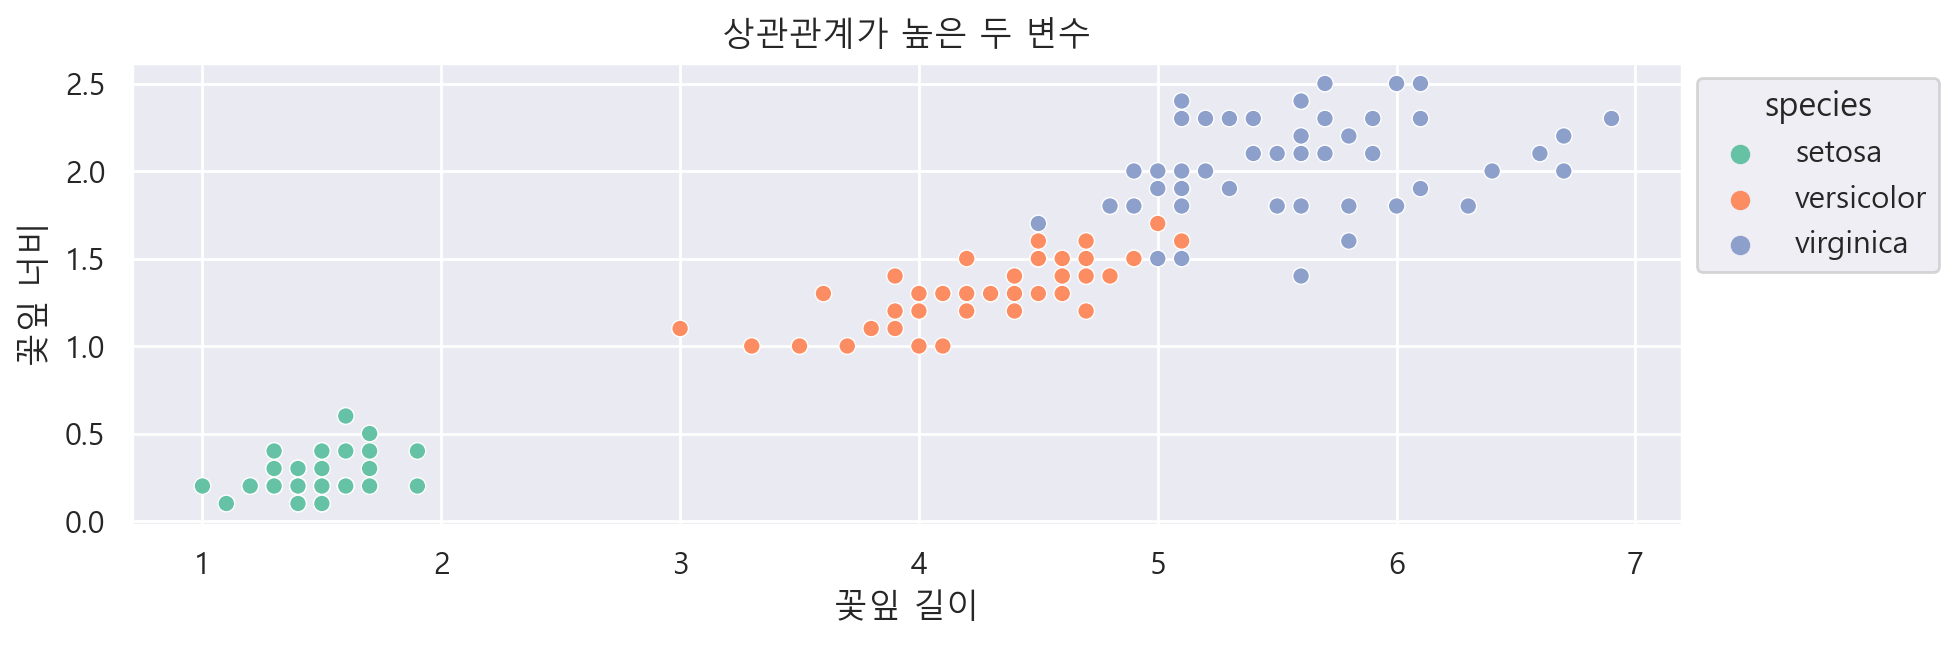

In [26]:
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title = '상관관계가 높은 두 변수',
      ylabel = '꽃잎 너비',
      xlabel = '꽃잎 길이')
plt.show()

## 2.3. seaborn 함수로 그래프 그리기
### 2.3.1. 관계형 그래프
- scatterplot, lineplot → relplot(서브플롯 제공) : x가 수치형 데이터

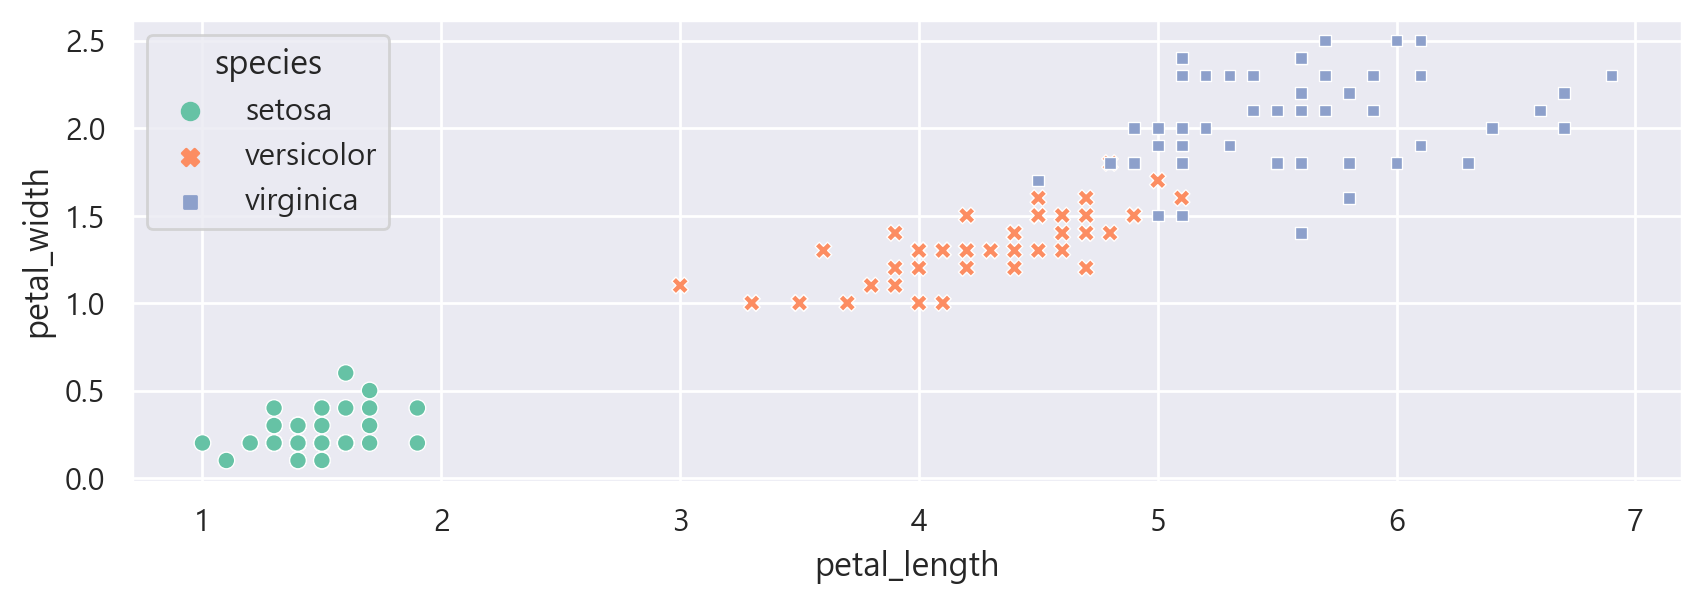

In [28]:
#종별 다른 색상과 다른 스타일로 scatterplot 그리기
sns.scatterplot(data=iris, 
                x='petal_length', y='petal_width', 
                hue='species', style='species')
plt.show()

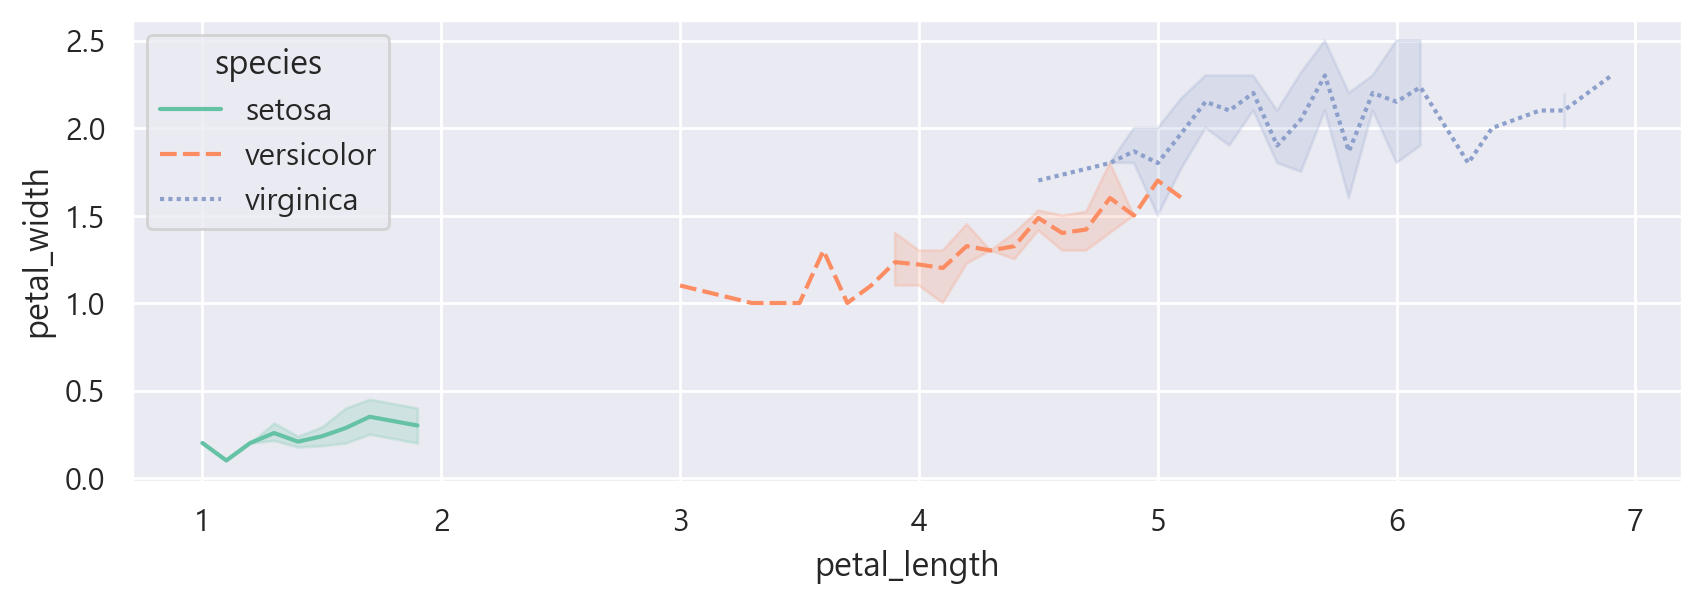

In [29]:
#종별 다른 색상과 다른 스타일로 lineplot 그리기
sns.lineplot(data=iris, 
                x='petal_length', y='petal_width', 
                hue='species', style='species')
plt.show()
#빗금 쳐진 쪽이 데이터 밀도(신뢰도)가 높음을 의미

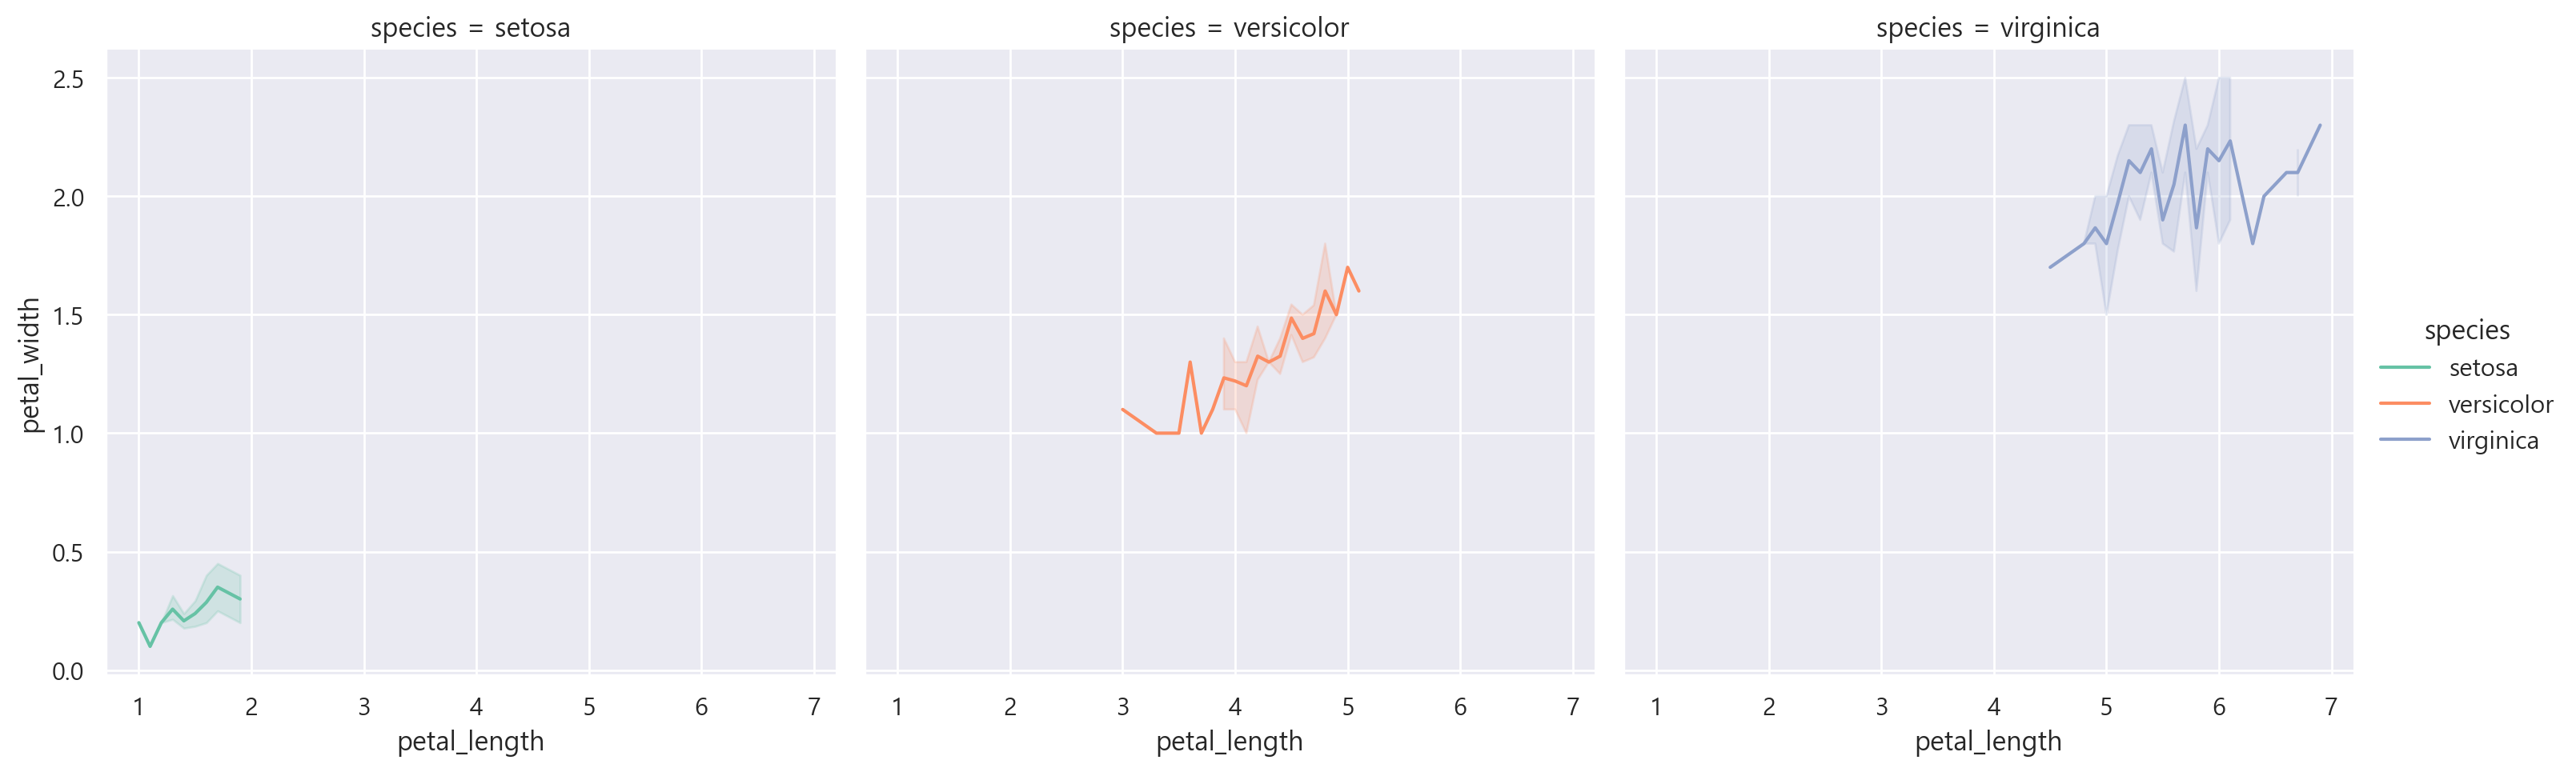

In [37]:
#종별 lineplot을 subplot으로 그리기
sns.relplot(data=iris,
           x='petal_length', y='petal_width',
           hue='species',
           kind='line', #서브플롯으로 그릴 그래프 종류(기본값: scatter)
           col='species', #col 단위로 subplot 구분해 표현
#           col_wrap=2, #한 줄에 표현될 subplot 수
#           facet_kws={'sharey':False, 
#                      'sharex':False
#                     } #축 공유
           )
plt.show()

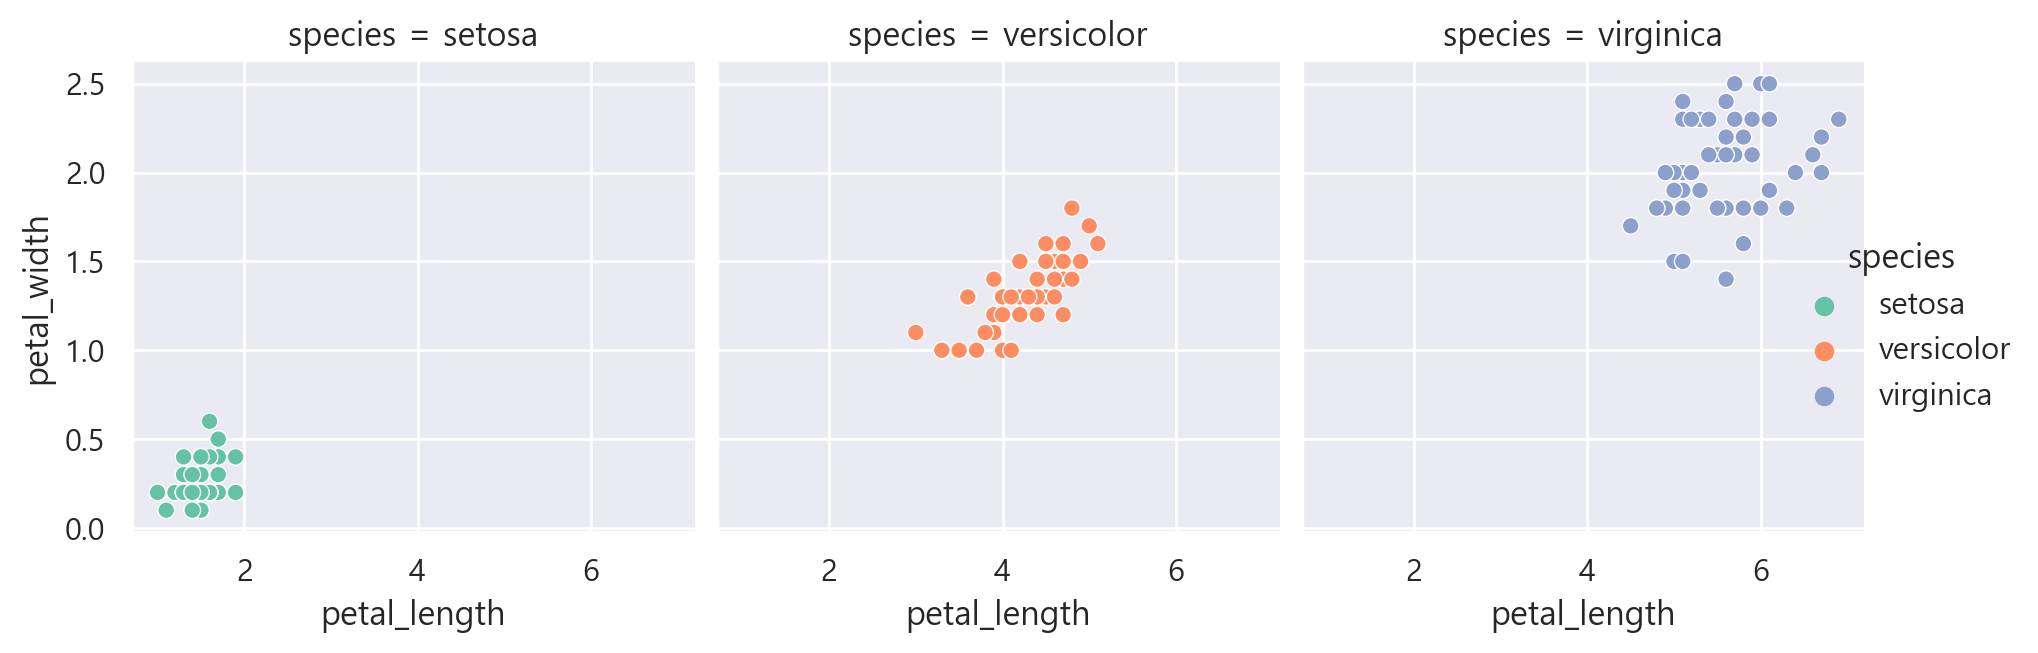

In [38]:
#종별 scatterplot을 subplot으로 그리기
g = sns.relplot(data=iris,
                x='petal_length', y='petal_width',
                hue='species',
                col='species')
#subplot figure 사이즈 지정
g.fig.set_size_inches(10,3)
plt.show()

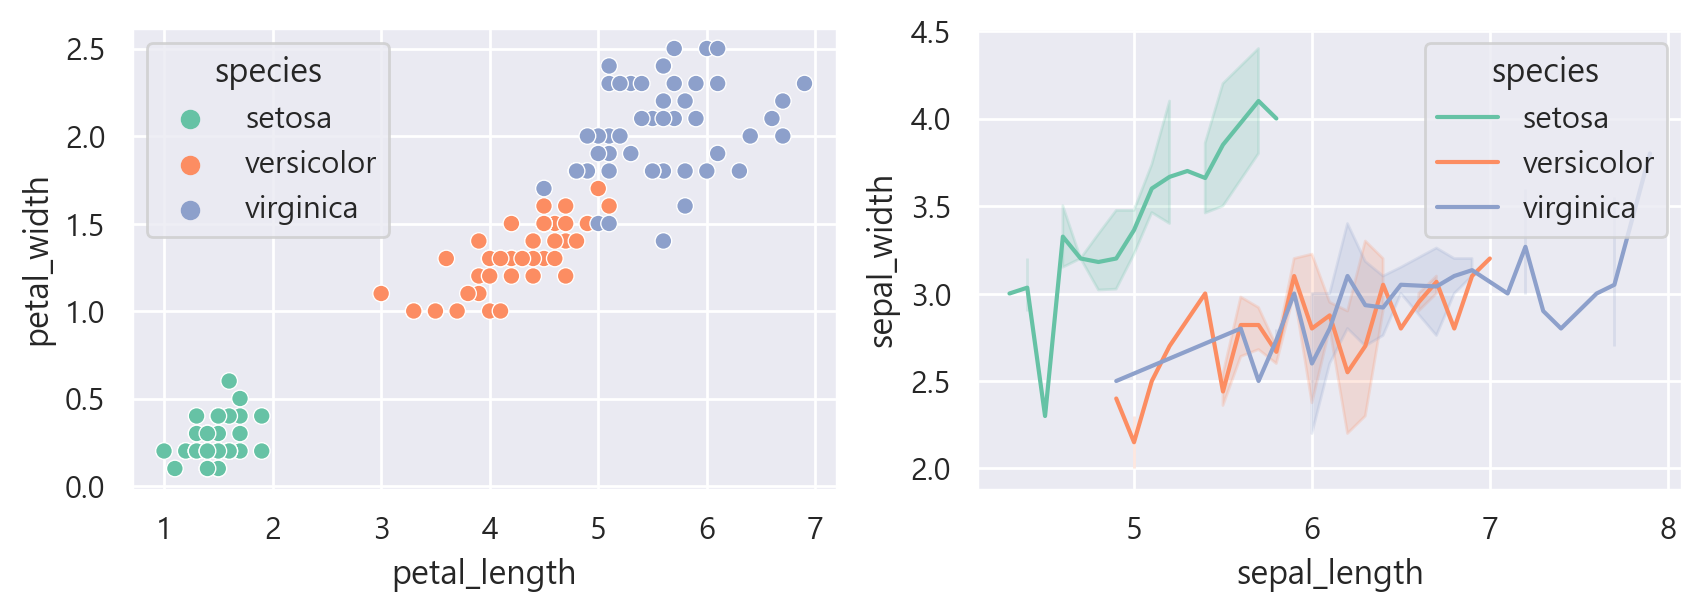

In [41]:
# ax[0]에는 scatter, ax[1]에는 line
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[0])
sns.lineplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=ax[1])
plt.show()

### 2.3.2. 범주형 그래프
- stipplot : 산점도, 무작위로 흩뿌림
- swarmplot : 중첩 없는 범주형 산점도 → 분포를 알 수 있음
- barplot, pointplot : 평균값
- countplot
- boxplot, violinplot, boxenplot → catplot 
    - Options are: "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count".

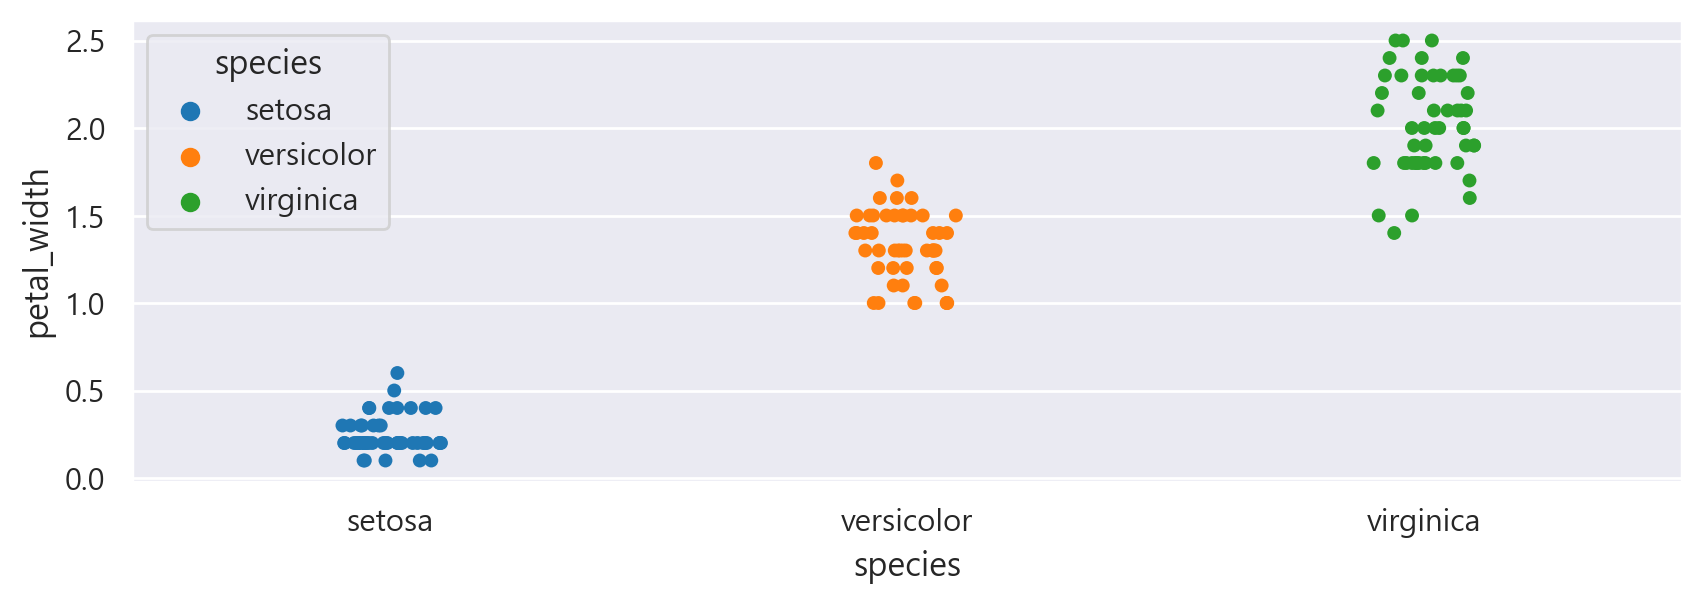

In [51]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', 
              hue='species', palette='tab10')
plt.show()

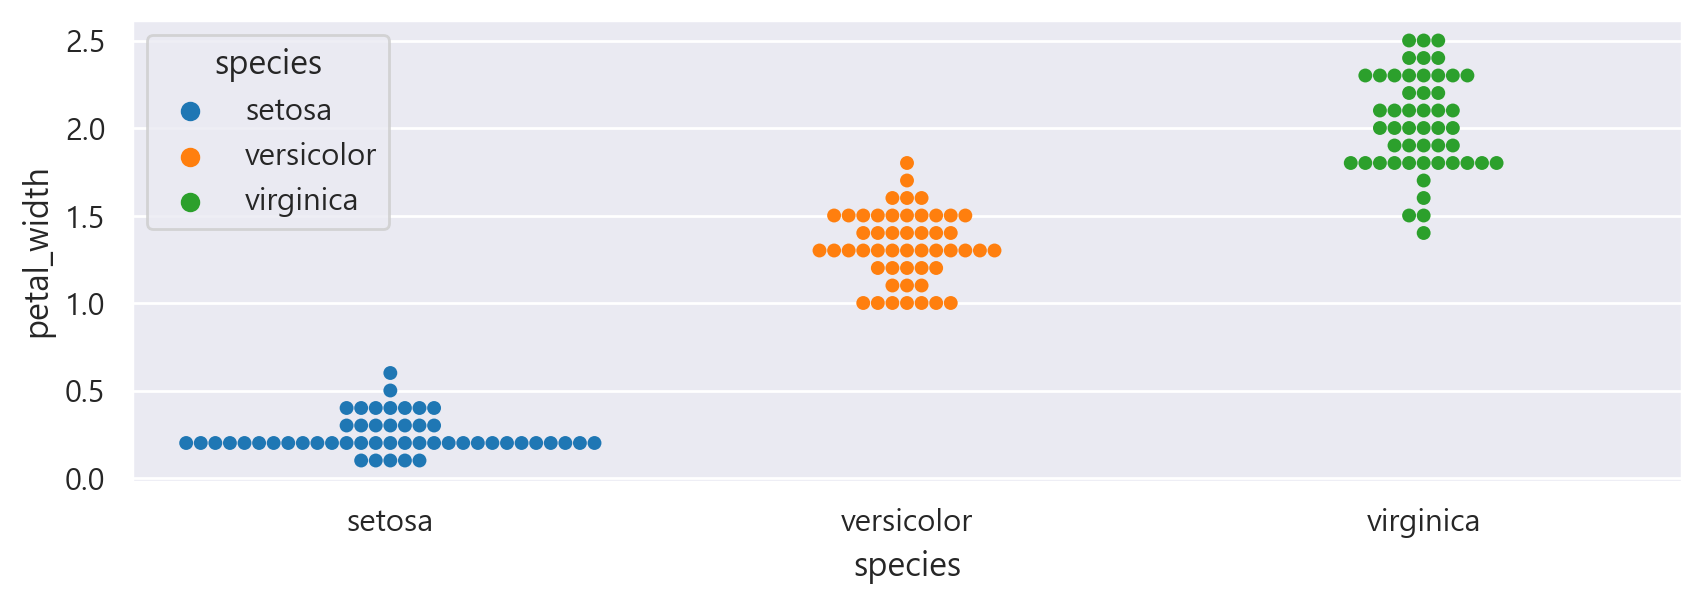

In [52]:
# x축이 범주형일 때의 산점도 (중첩되지 않게)
sns.swarmplot(data=iris, x='species', y='petal_width', 
              hue='species', palette='tab10')
plt.show()

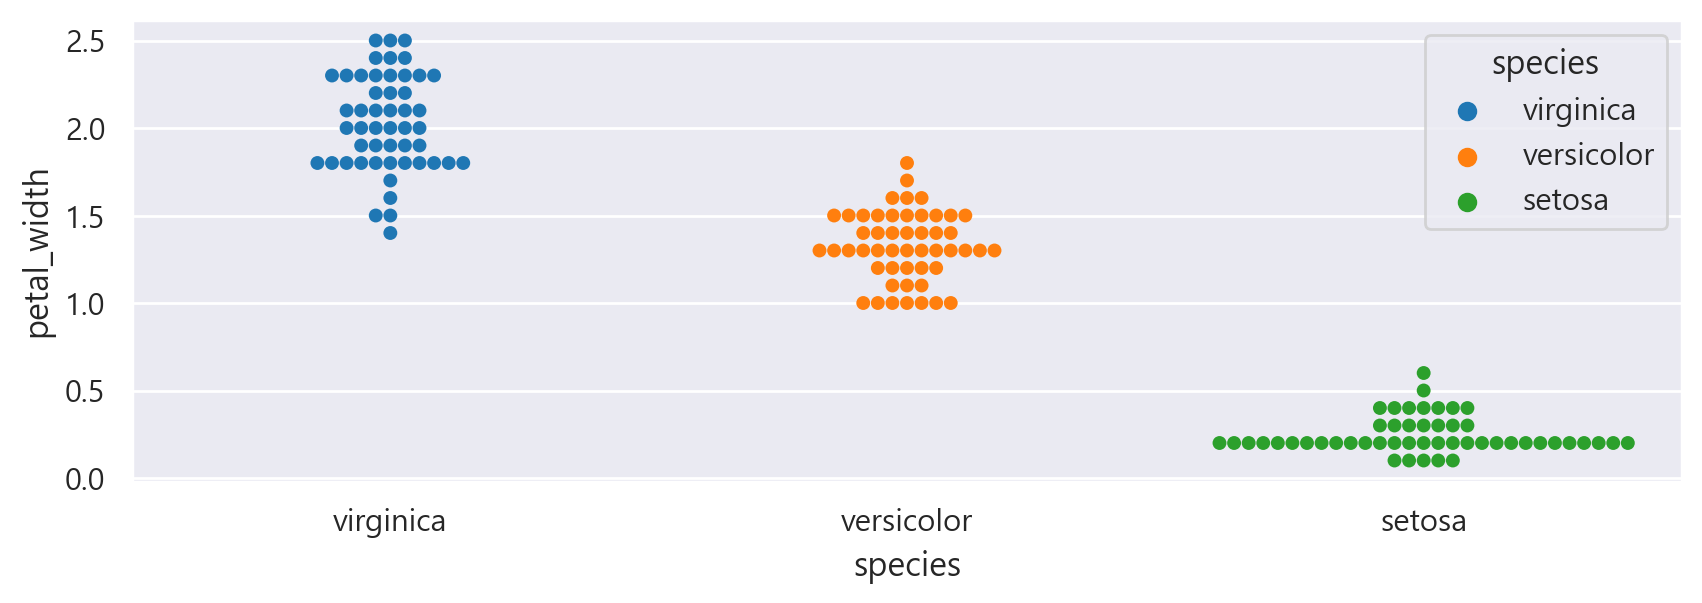

In [53]:
#내림차순으로 정렬된 iris 범주형 산점도
sns.swarmplot(data=iris.sort_values('petal_width', ascending=False), 
              x='species', y='petal_width', 
              hue='species', palette='tab10')
plt.show()

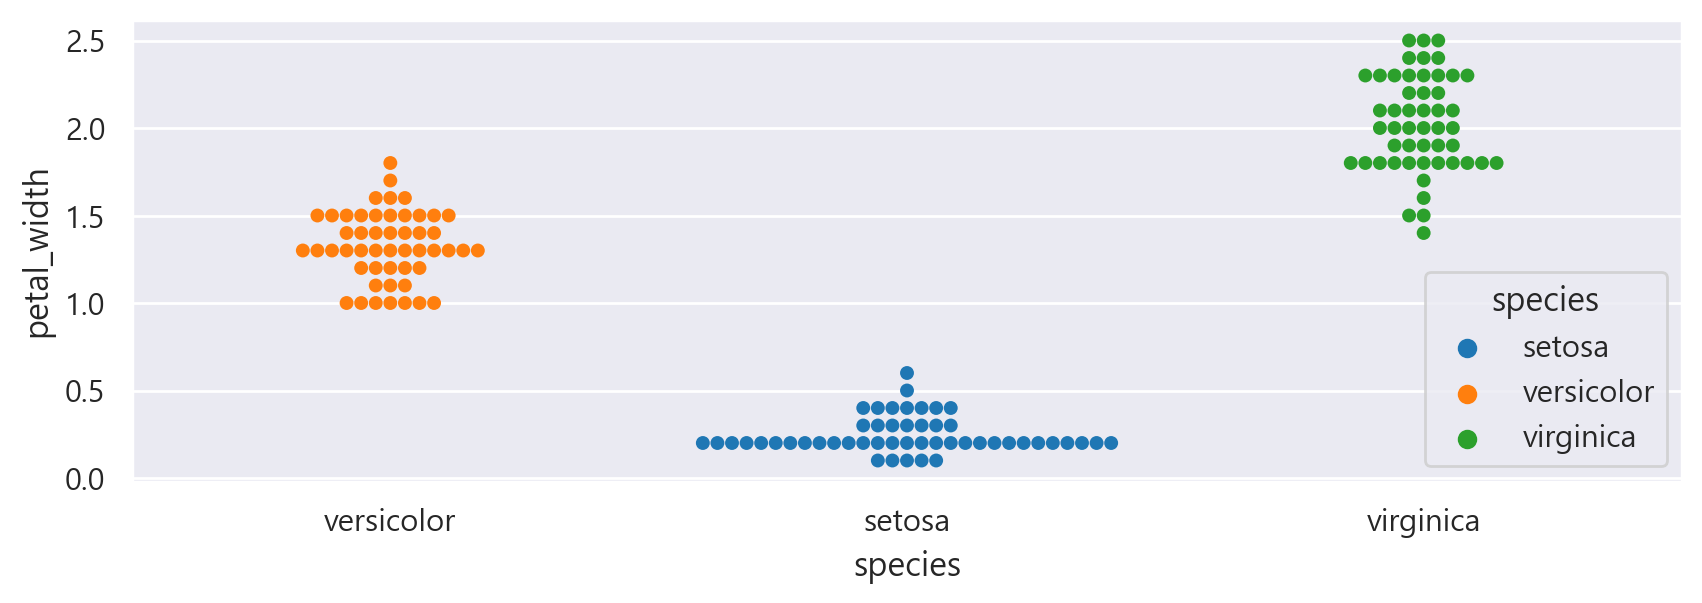

In [55]:
#x축(범주)의 순서를 임의로 정할 수 있음 (플롯 순서만)
sns.swarmplot(data=iris,
              order=['versicolor', 'setosa', 'virginica'],
              x='species', y='petal_width', 
              hue='species', palette='tab10')
plt.show()

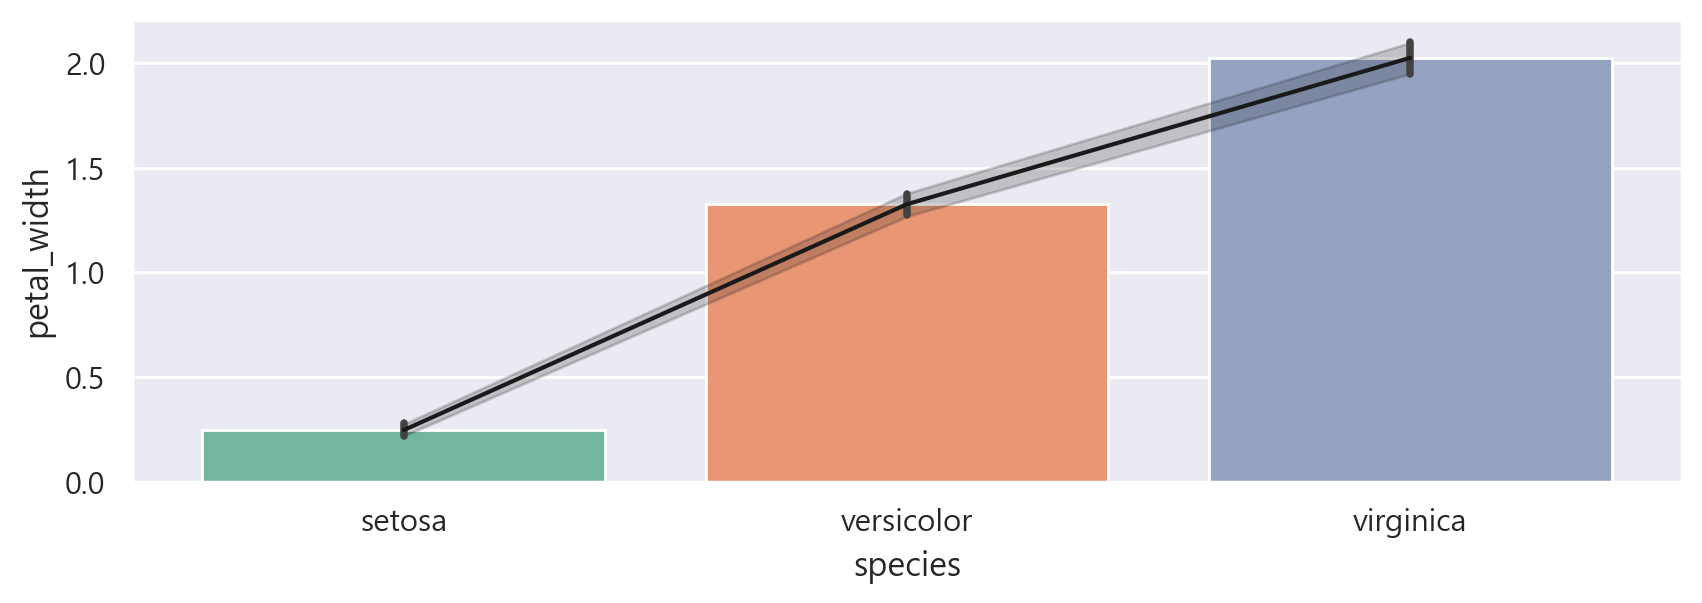

In [61]:
# barplot : 각 범주별 평균값과 그에 대한 신뢰 구간
# 신뢰구간 제외 : errorbar=None
sns.barplot(data=iris,
            x='species', y='petal_width',
            #errorbar=None
           )
sns.lineplot(data=iris, 
             x='species', y='petal_width', 
             color='k')
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

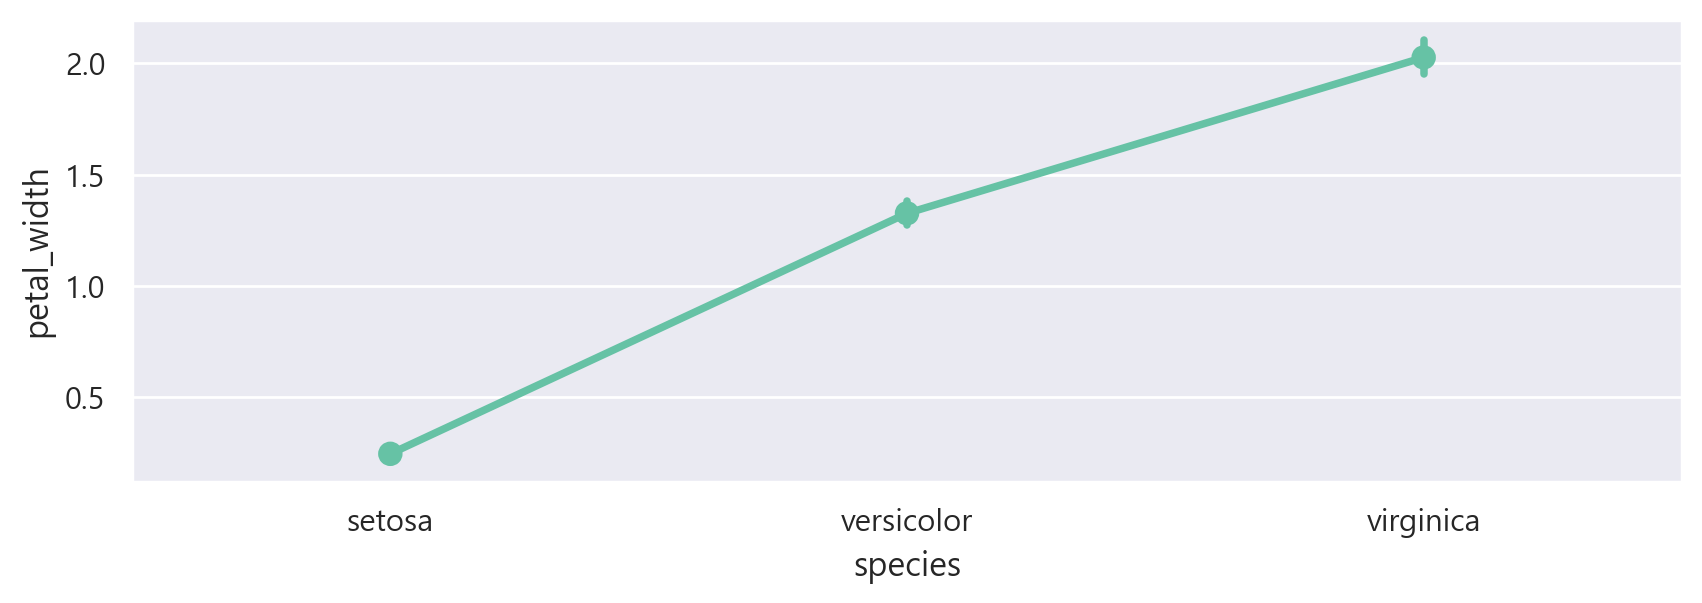

In [63]:
# polintplot
sns.pointplot(\
              data=iris,
              x='species', y='petal_width'
             )

In [64]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


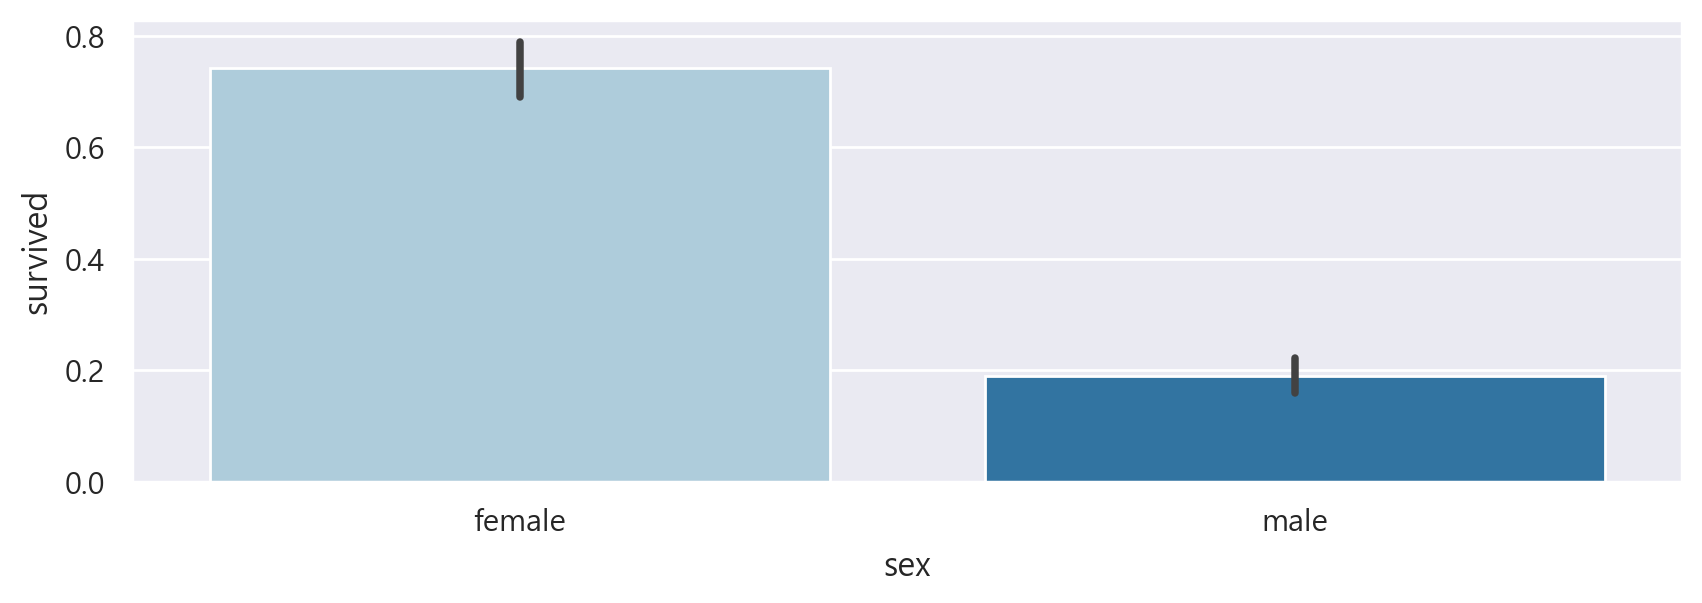

In [66]:
# 성별 평균 생존율을 막대그래프
sns.barplot(data=titanic, x='sex', y='survived',
           order=['female', 'male'],
           palette='Paired')
plt.show()

In [67]:
#남녀 데이터 수 (결측치 없는 항목 카운트)
titanic.groupby('sex')['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [69]:
#남녀 데이터 수 (값 기준 자동 내림차순 정렬)
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

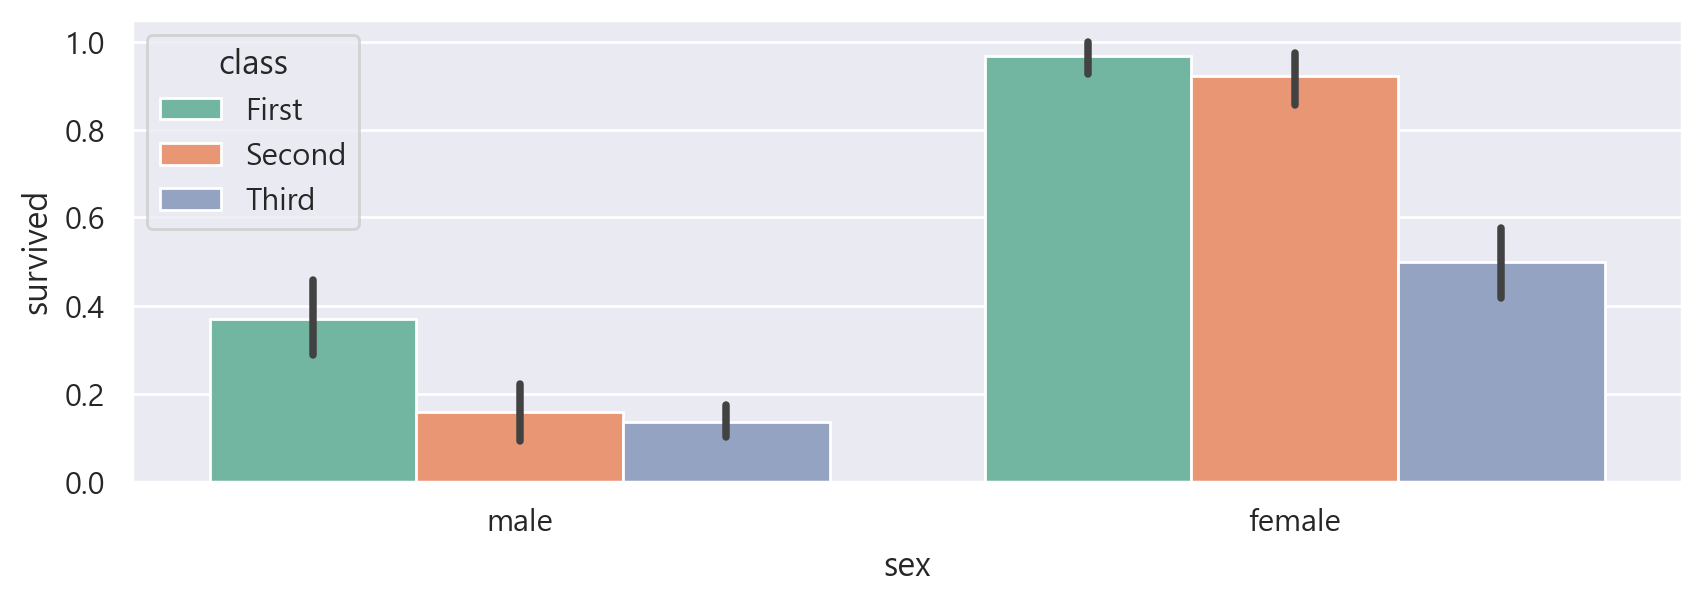

In [71]:
# class별 생존률 + 성별
sns.barplot(data=titanic, 
#             x='class', y='survived',
#             hue='sex'
            x='sex', y='survived',
            hue='class'
           )

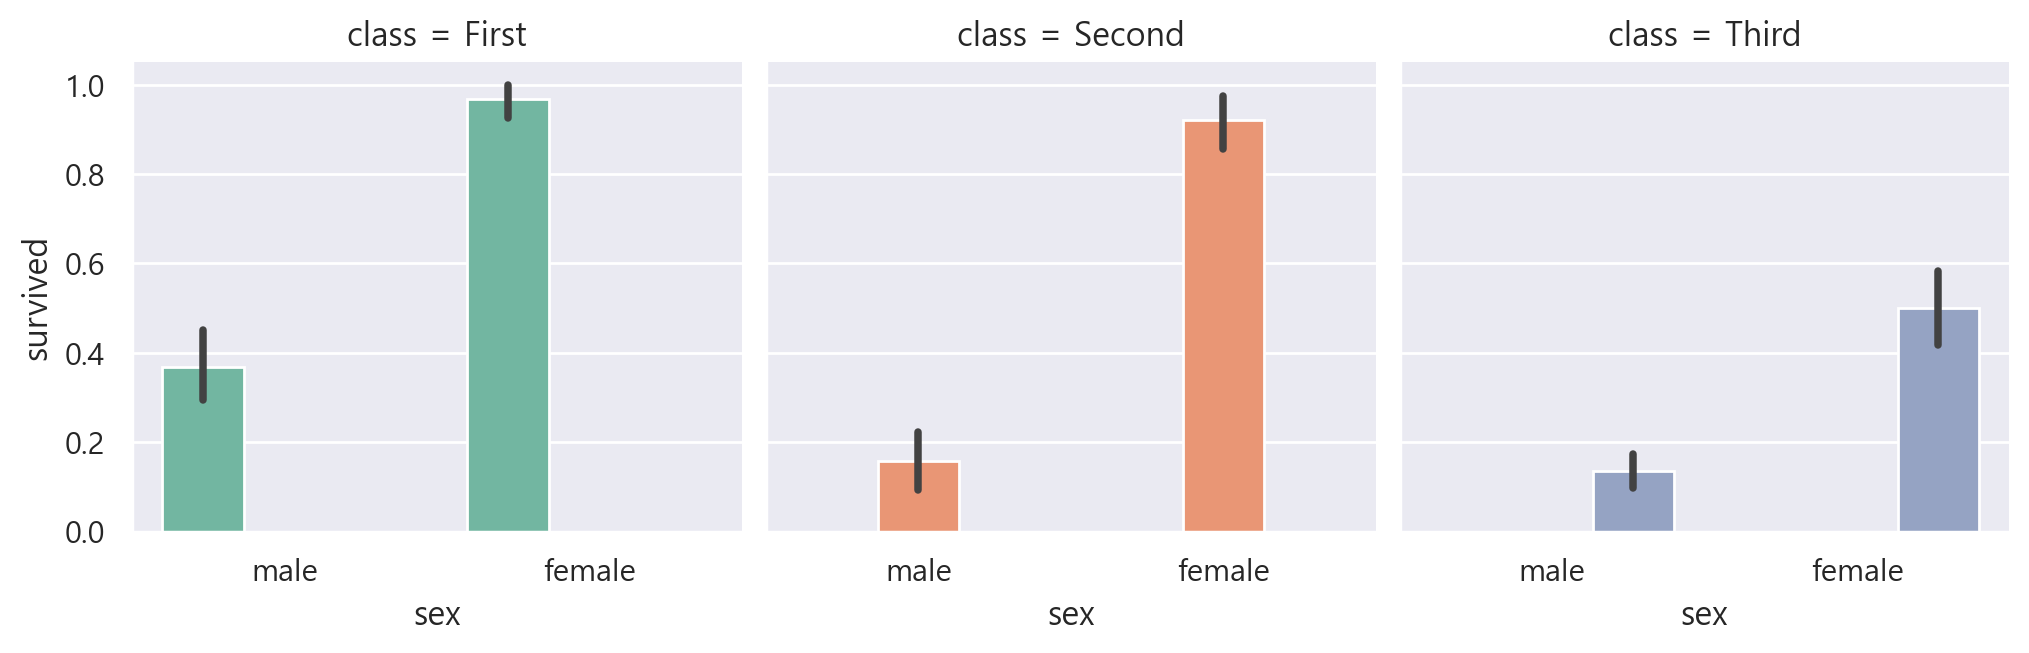

In [72]:
#class별 성별 생존률을 서브플롯으로 구분
g = sns.catplot(data=titanic,
                x='sex', y='survived',
                hue='class',
                col='class',
                kind='bar' #default stripplot
               )
g.fig.set_size_inches(10,3)
plt.show()

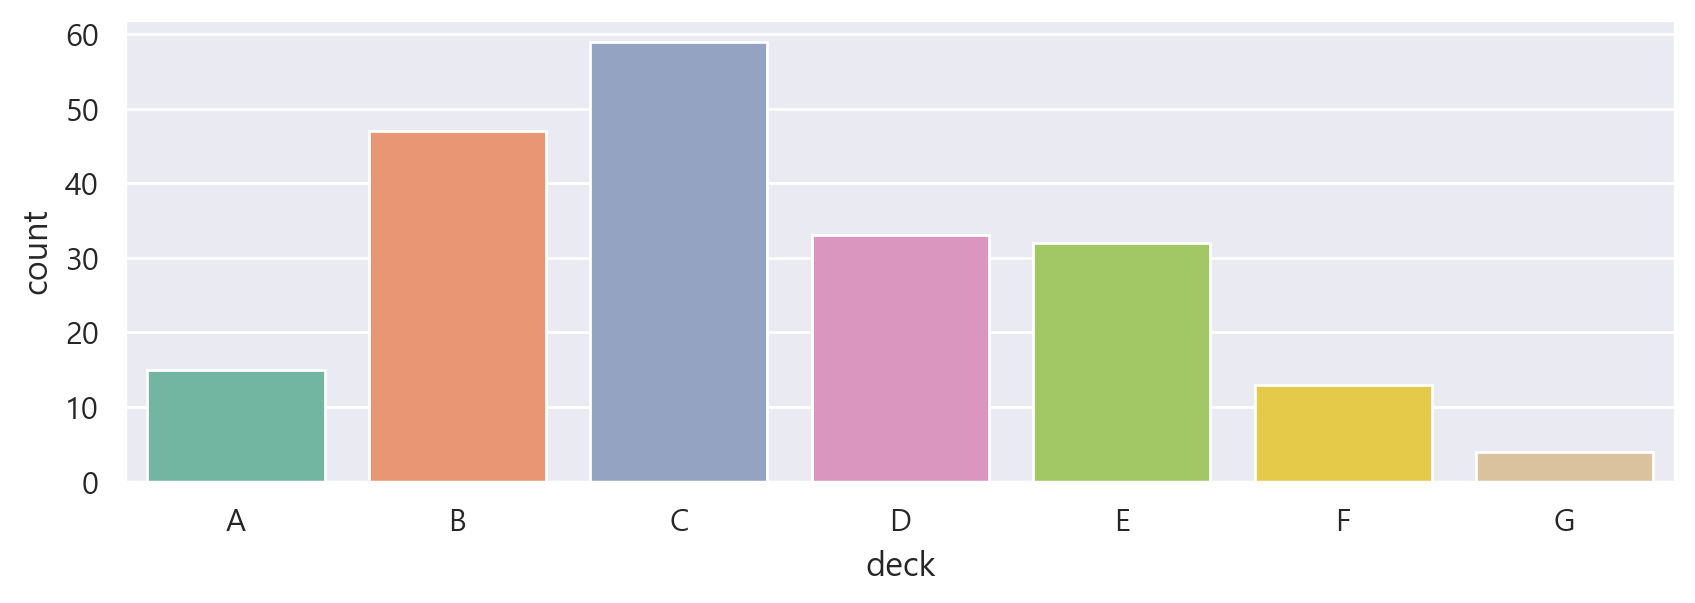

In [73]:
#deck별 데이터수를 막대그래프로(countplot)
sns.countplot(data=titanic, x='deck')
plt.show()

In [75]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

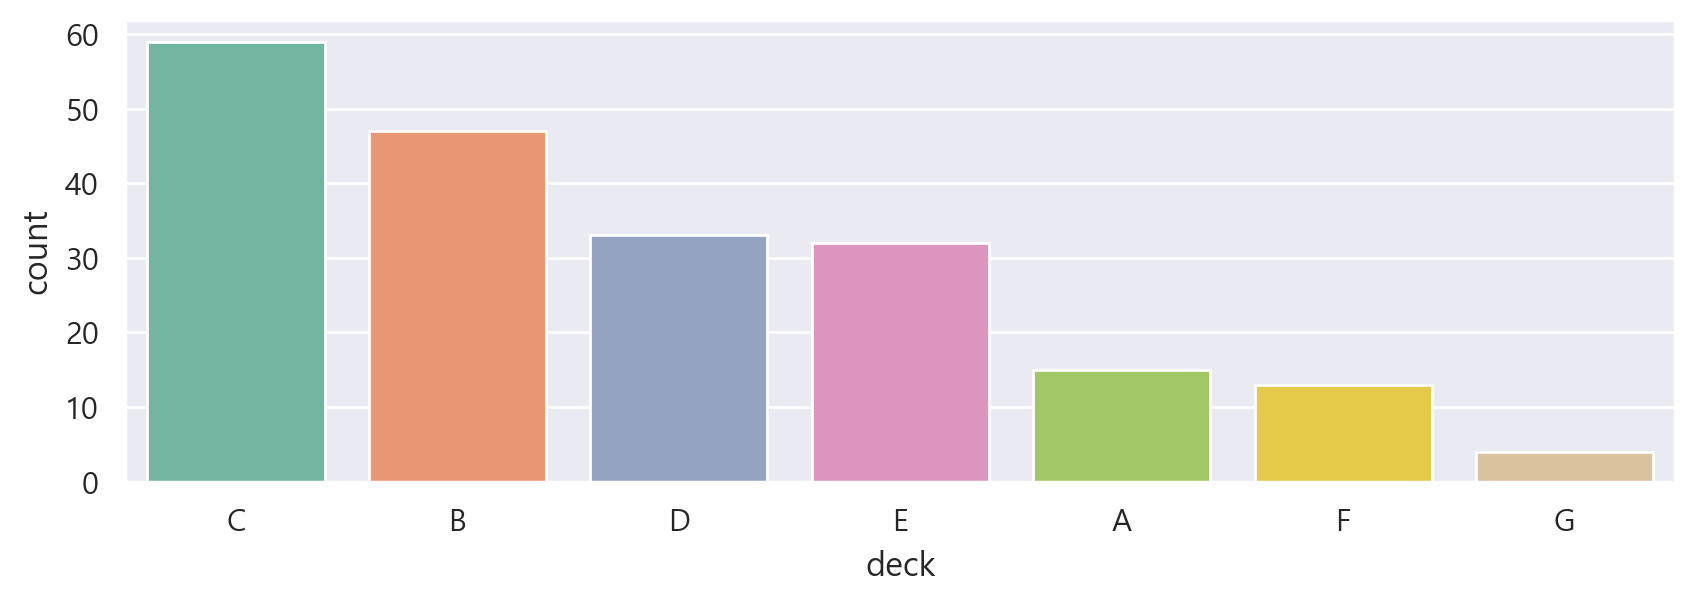

In [76]:
sns.countplot(data=titanic, x='deck', order=titanic['deck'].value_counts().index)
plt.show()

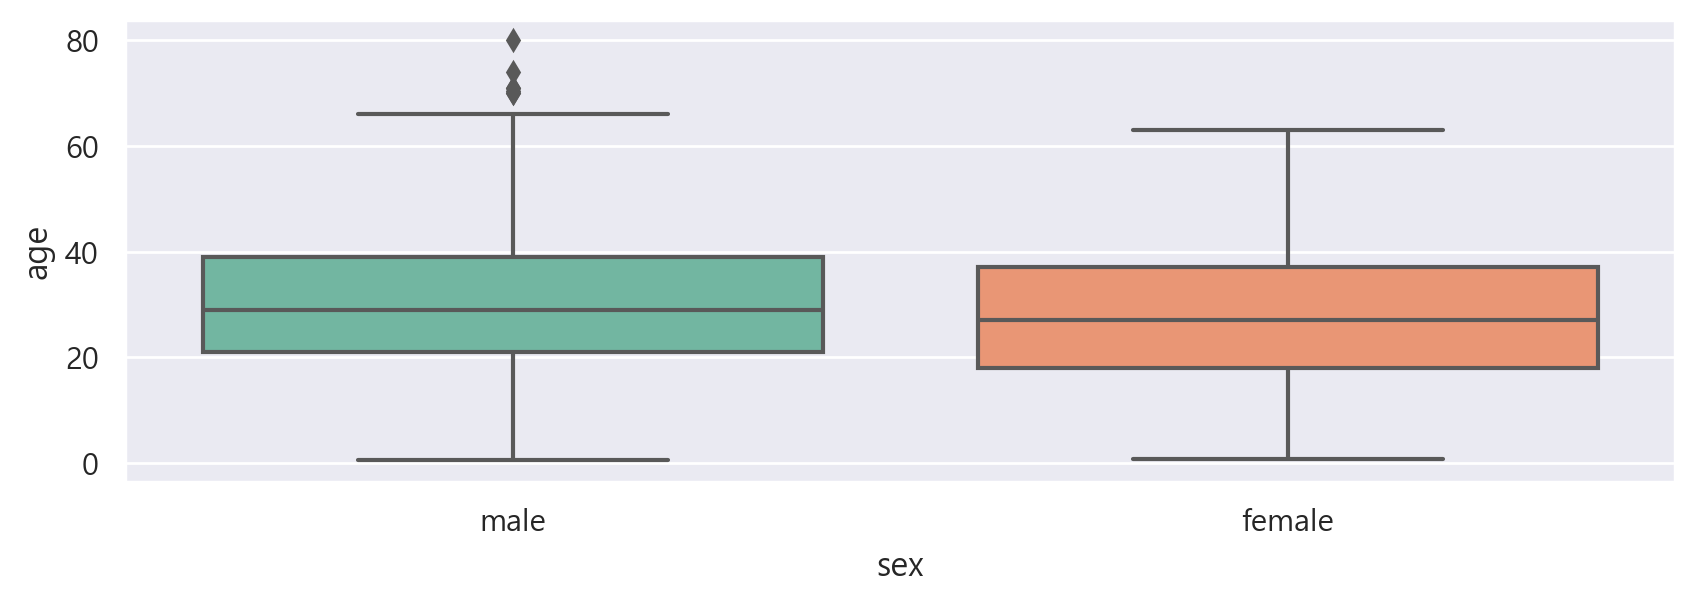

In [78]:
sns.boxplot(data=titanic, x='sex', y='age')
plt.show()

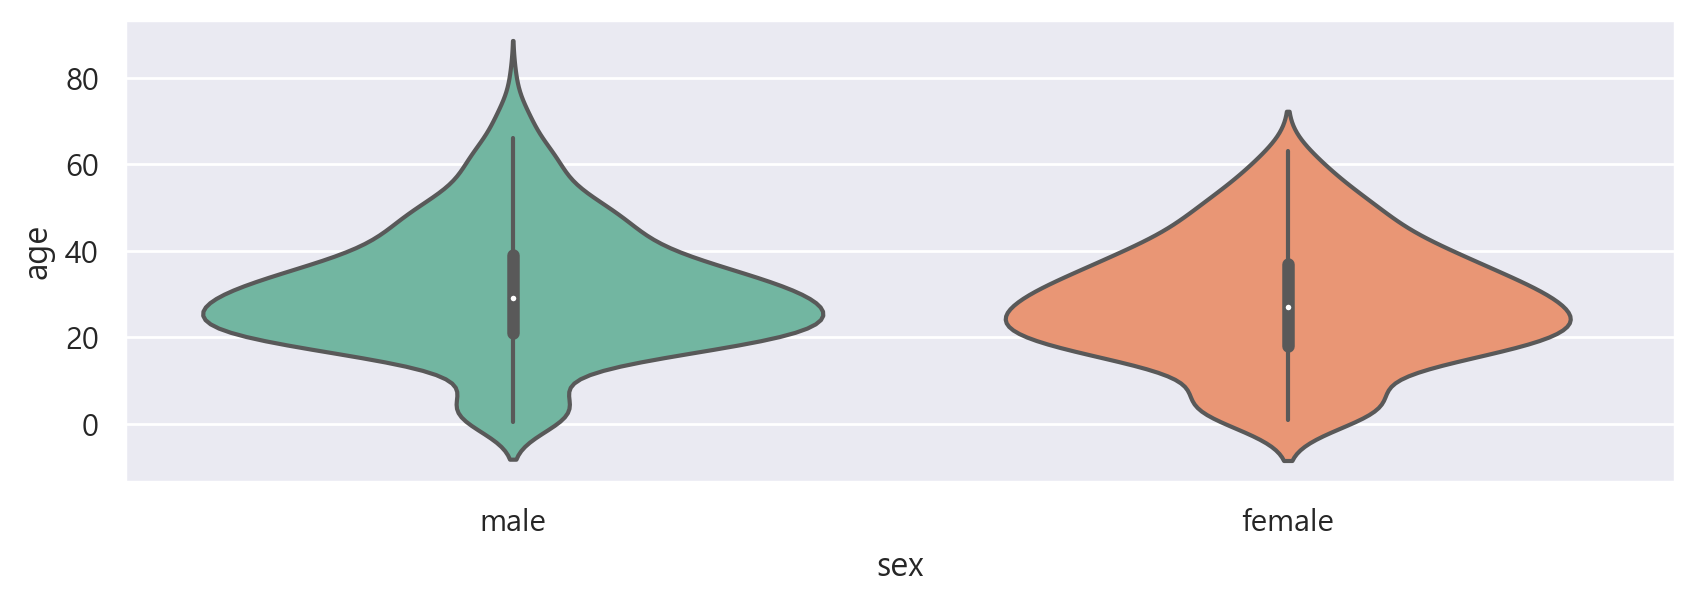

In [77]:
sns.violinplot(data=titanic, x='sex', y='age')
plt.show()

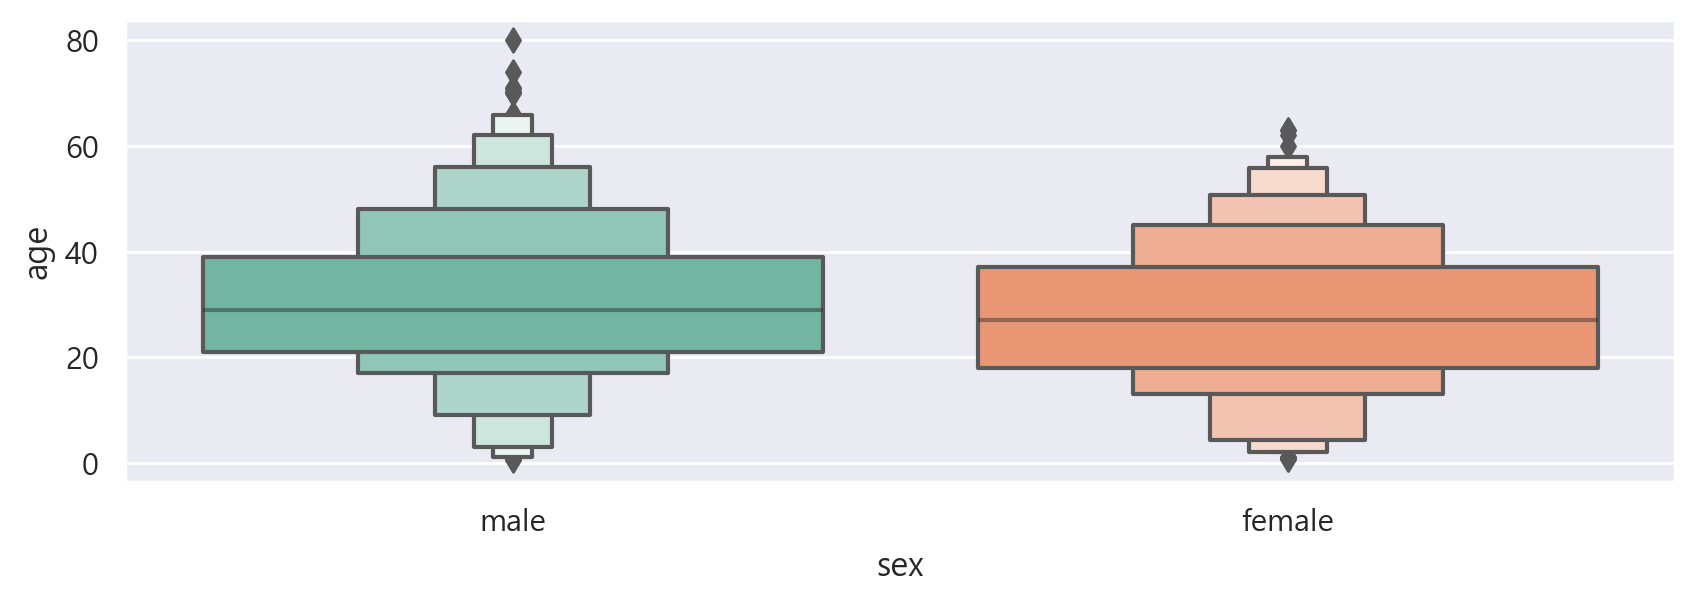

In [79]:
sns.boxenplot(data=titanic, x='sex', y='age')
plt.show()

### 2.3.3. 쌍관계 그래프
- pairplot : 모든 수치형 변수쌍에 대해 산점도와 히스토그램

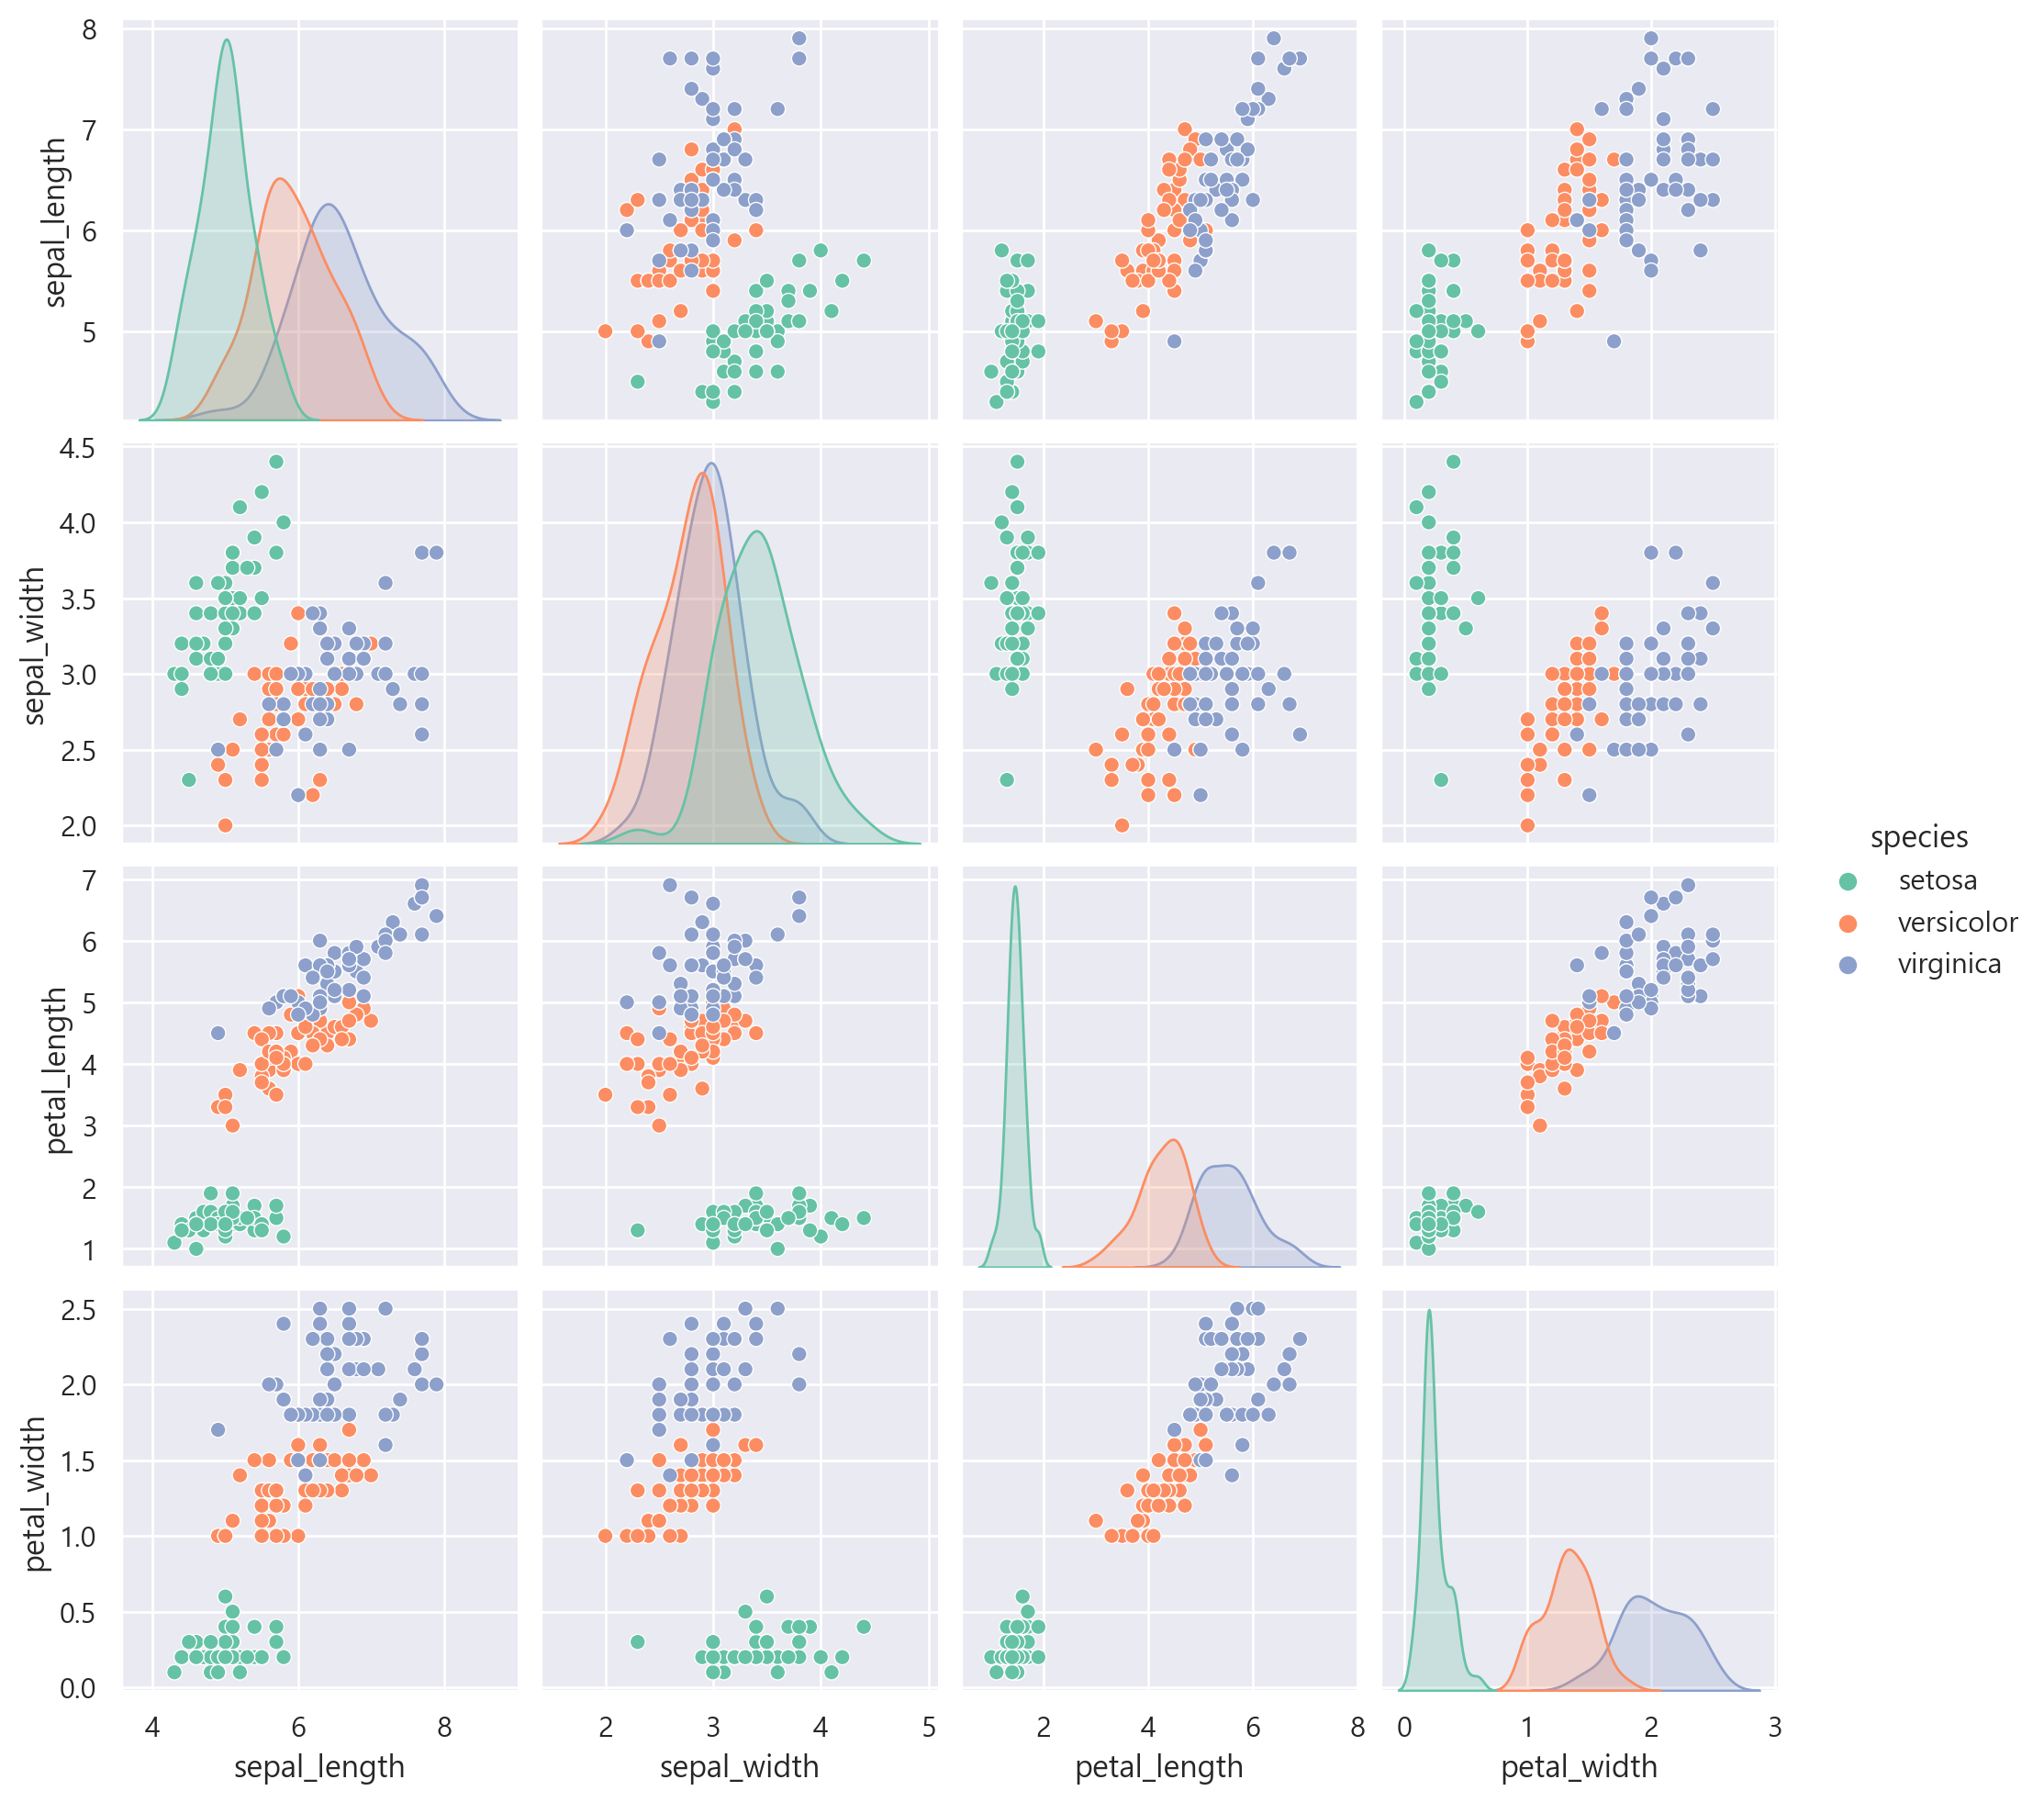

In [80]:
sns.pairplot(data=iris, hue='species')
plt.show()
#규모가 크고 변수 가지수도 많은 실무 데이터에서는 쓸모가 적음

### 2.3.4. 밀도 그래프

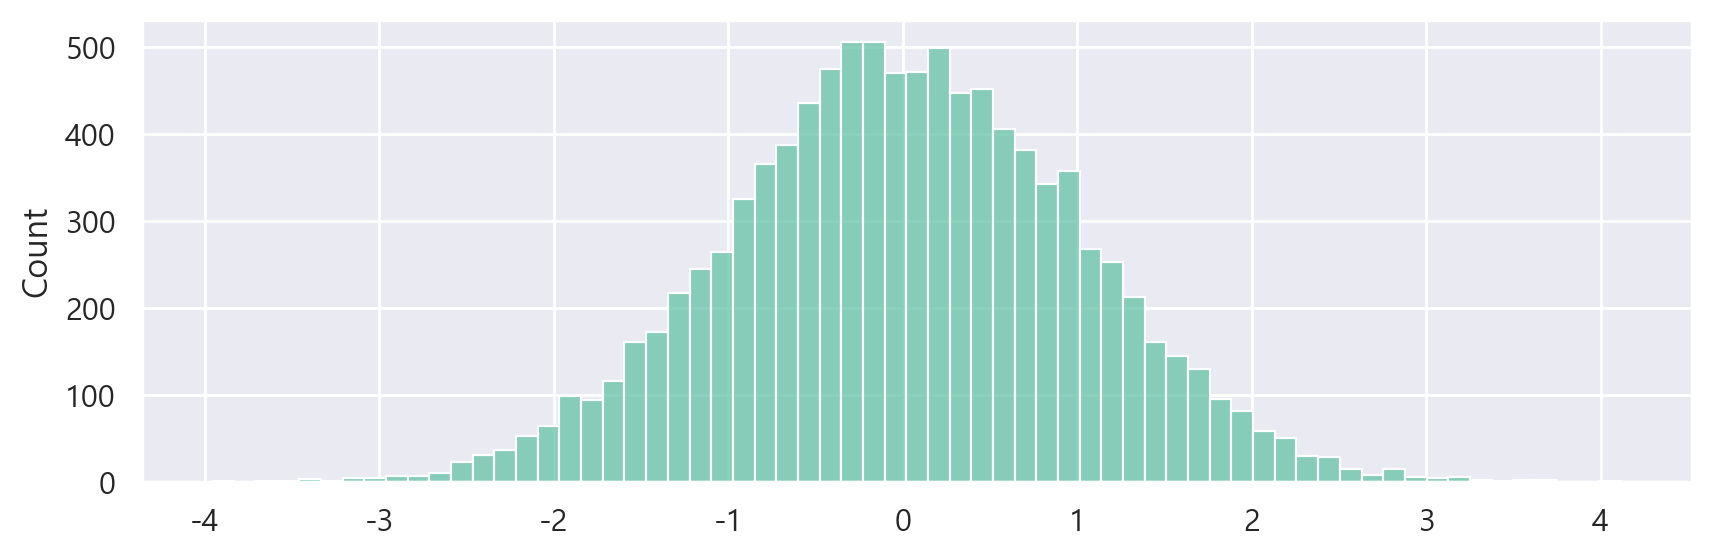

In [83]:
#도수분포표(히스토그램) : count!
import numpy as np
x= np.random.randn(10000)
#평균 0, 표준편차 1인 10000개 정규분포 데이터
sns.histplot(x)
plt.show()

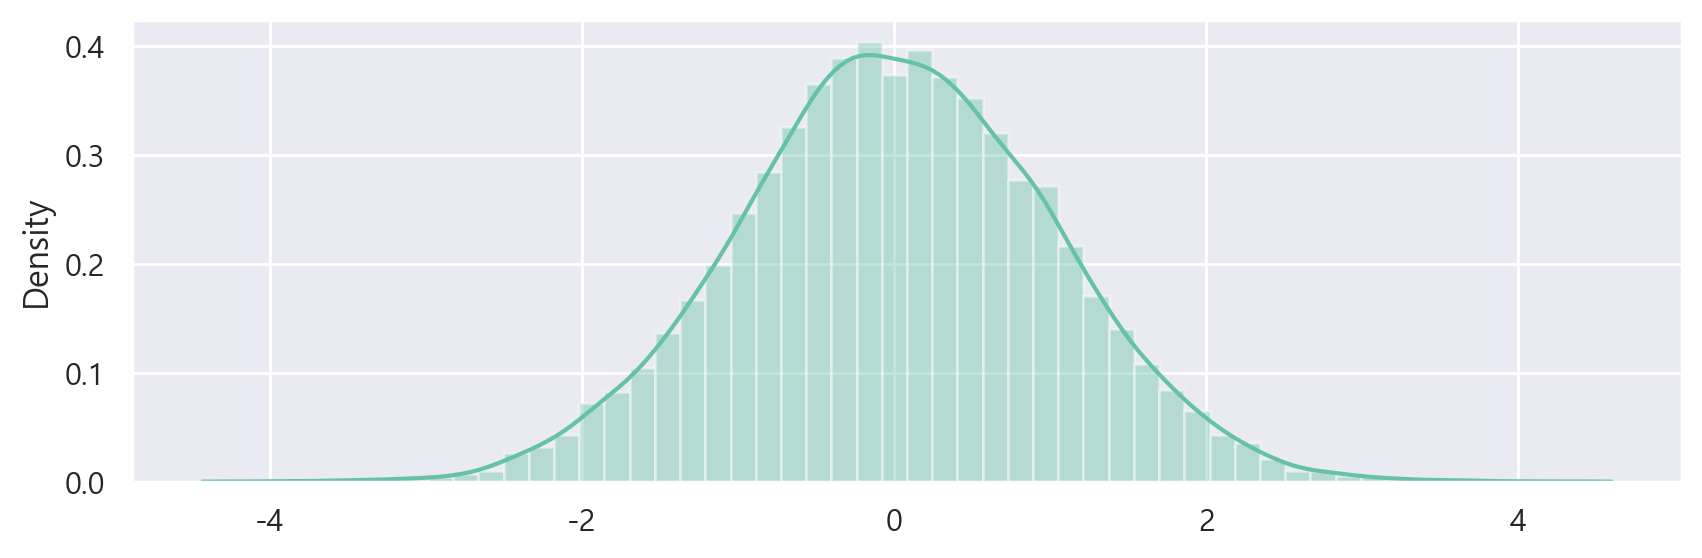

In [85]:
sns. distplot(x) #density로, 거기에 곡선을 얹어 줘요!
plt.show()

### 2.3.5. 회귀 그래프
- regplot → lmplot(서브 플롯)

In [87]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

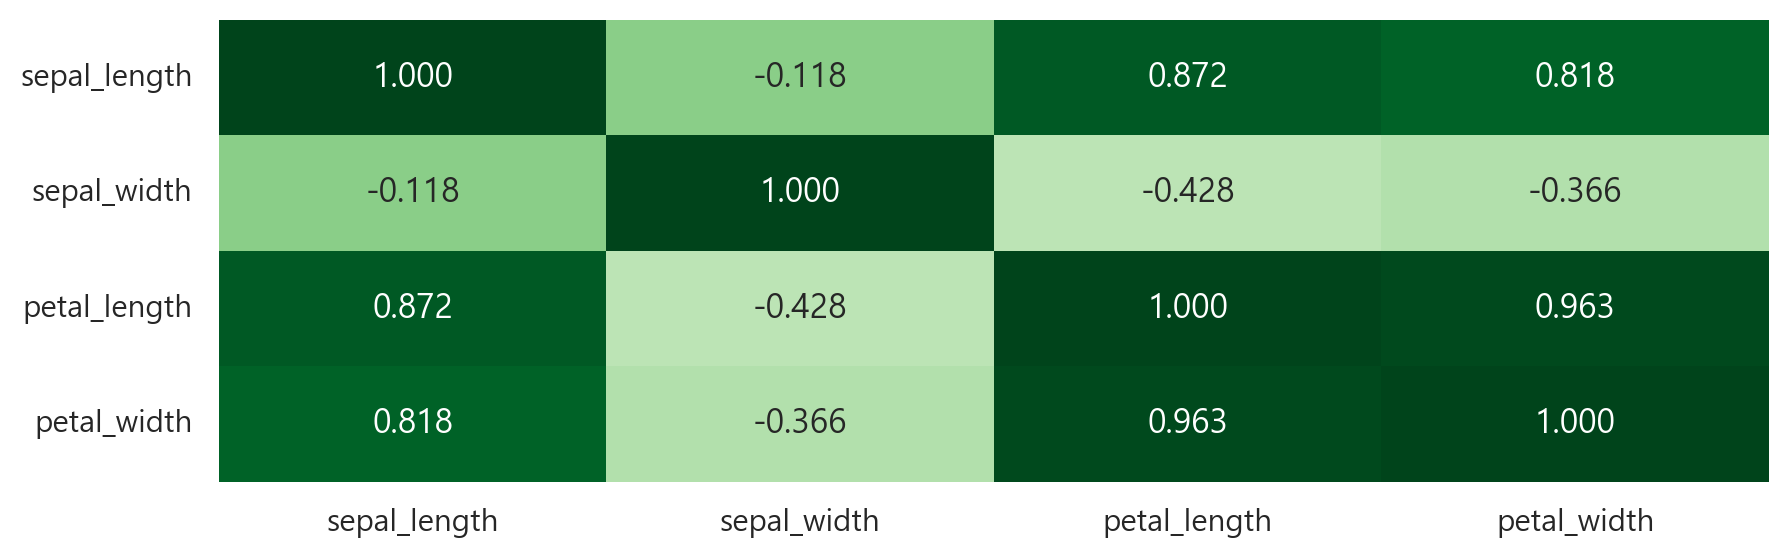

In [89]:
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f',cmap='Greens', cbar=False)

In [91]:
np.ones_like(corr, dtype=bool) #corr과 구조(structure)가 같은, 1로 채워진 배열

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

<Axes: >

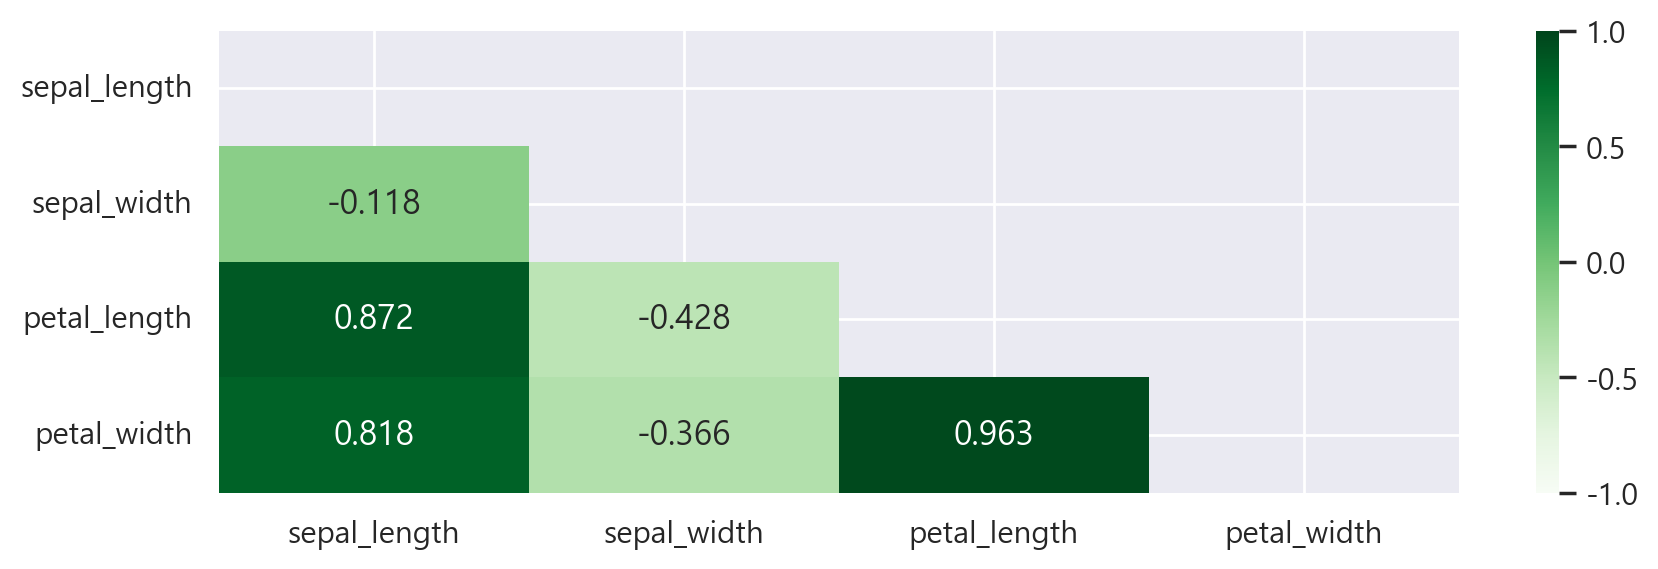

In [94]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Greens', 
            mask=mask)

# petal_length와 petal_width의 상관계수가 높음을 확인.

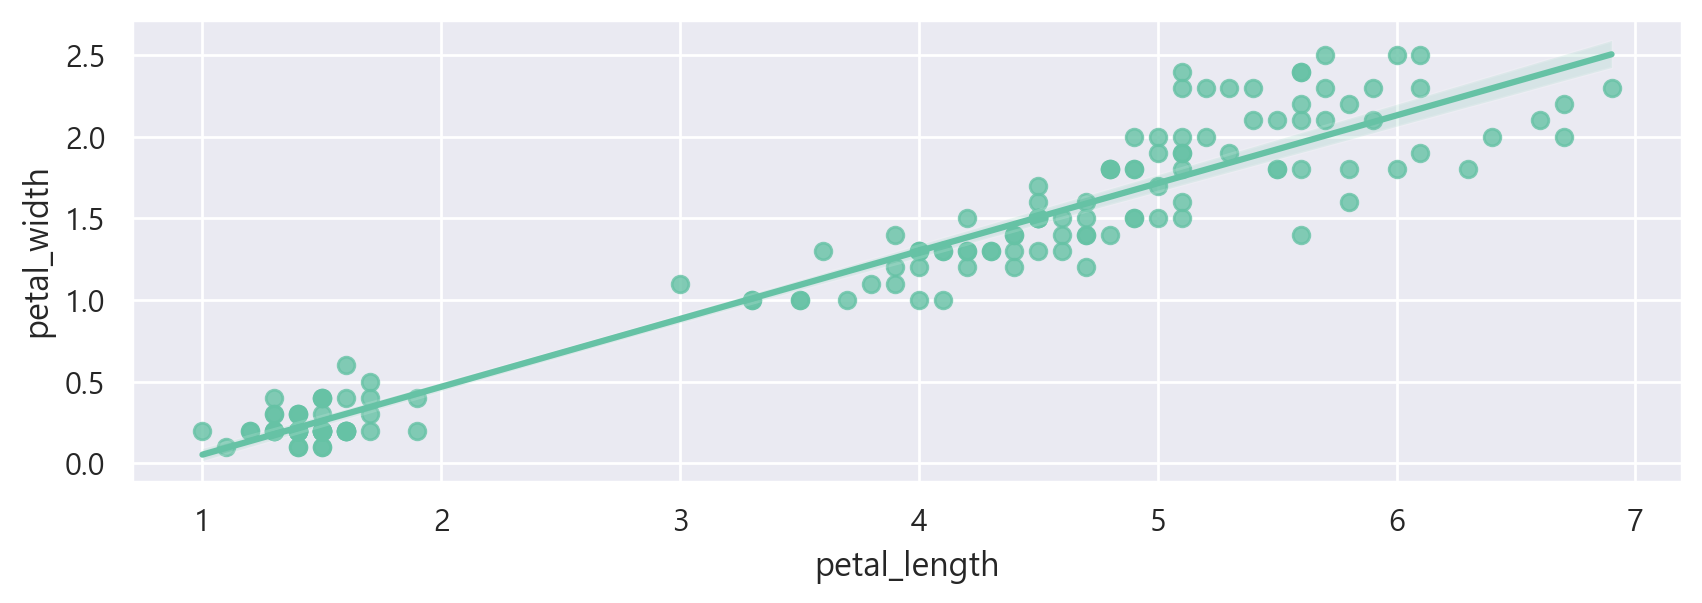

In [95]:
#회귀 그래프 regplot (hue 사용 불가) → lmplot (hue 사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

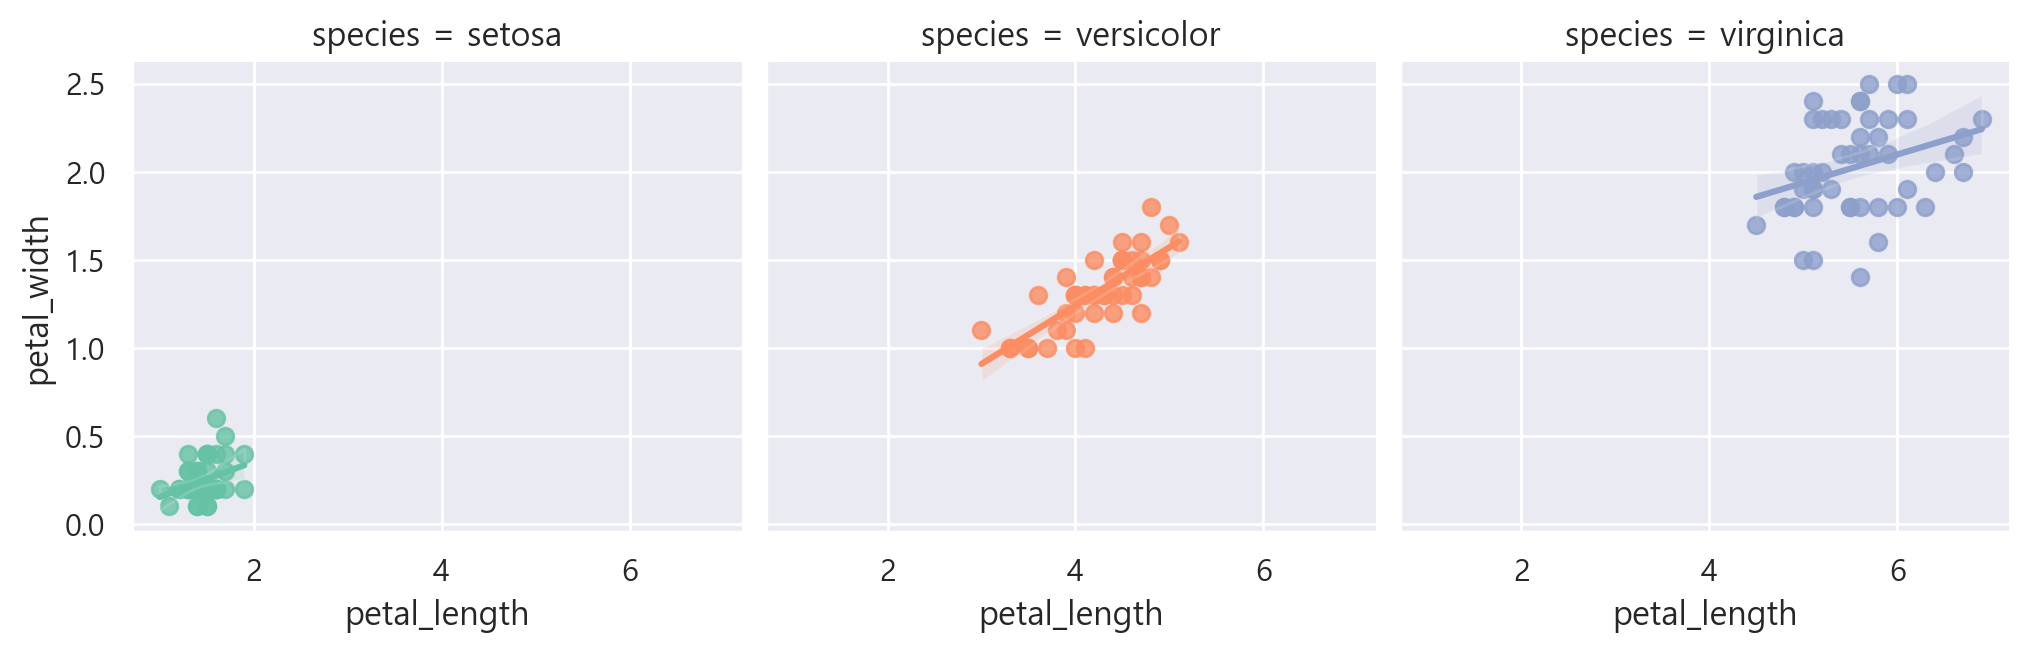

In [98]:
g = sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species',
               col='species')
g.fig.set_size_inches(10,3)
plt.show()

## 2.4. 다중그래프를 위한 FacetGrid

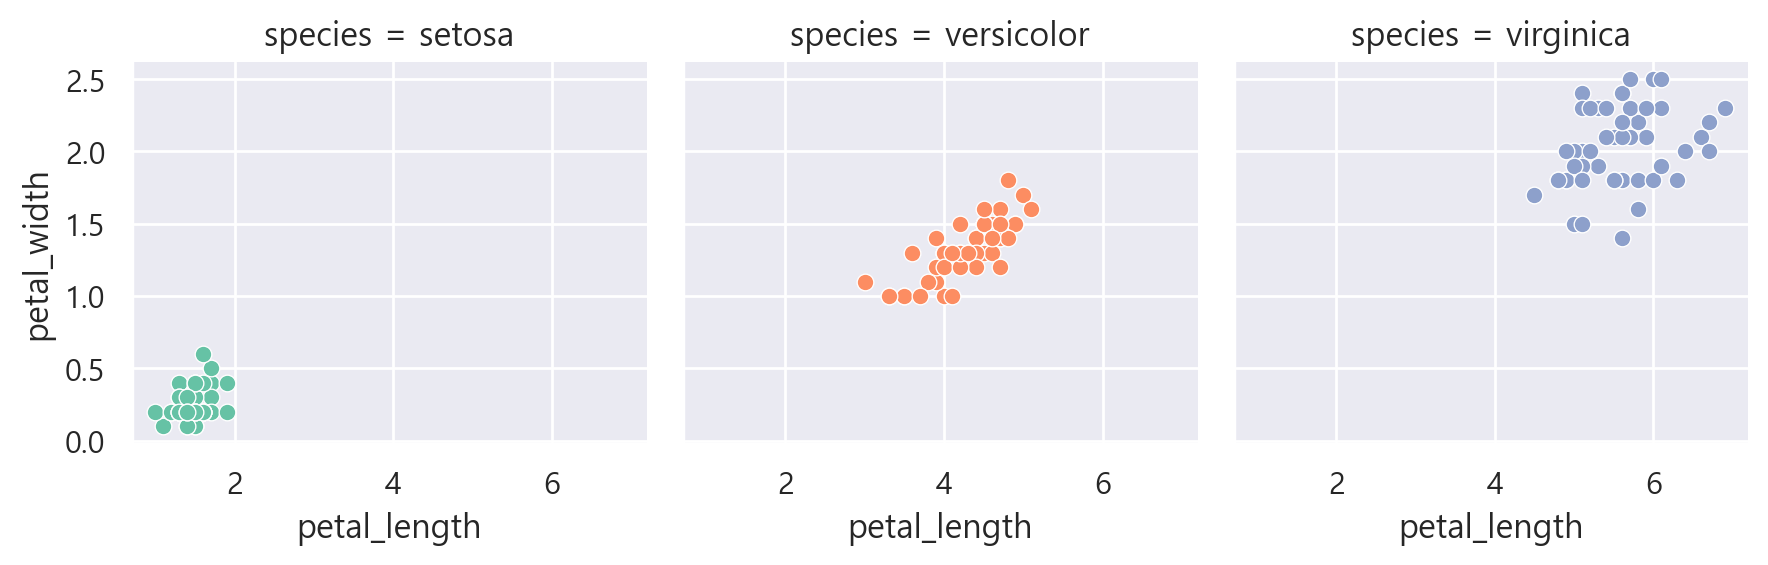

In [99]:
g = sns.FacetGrid(iris,col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

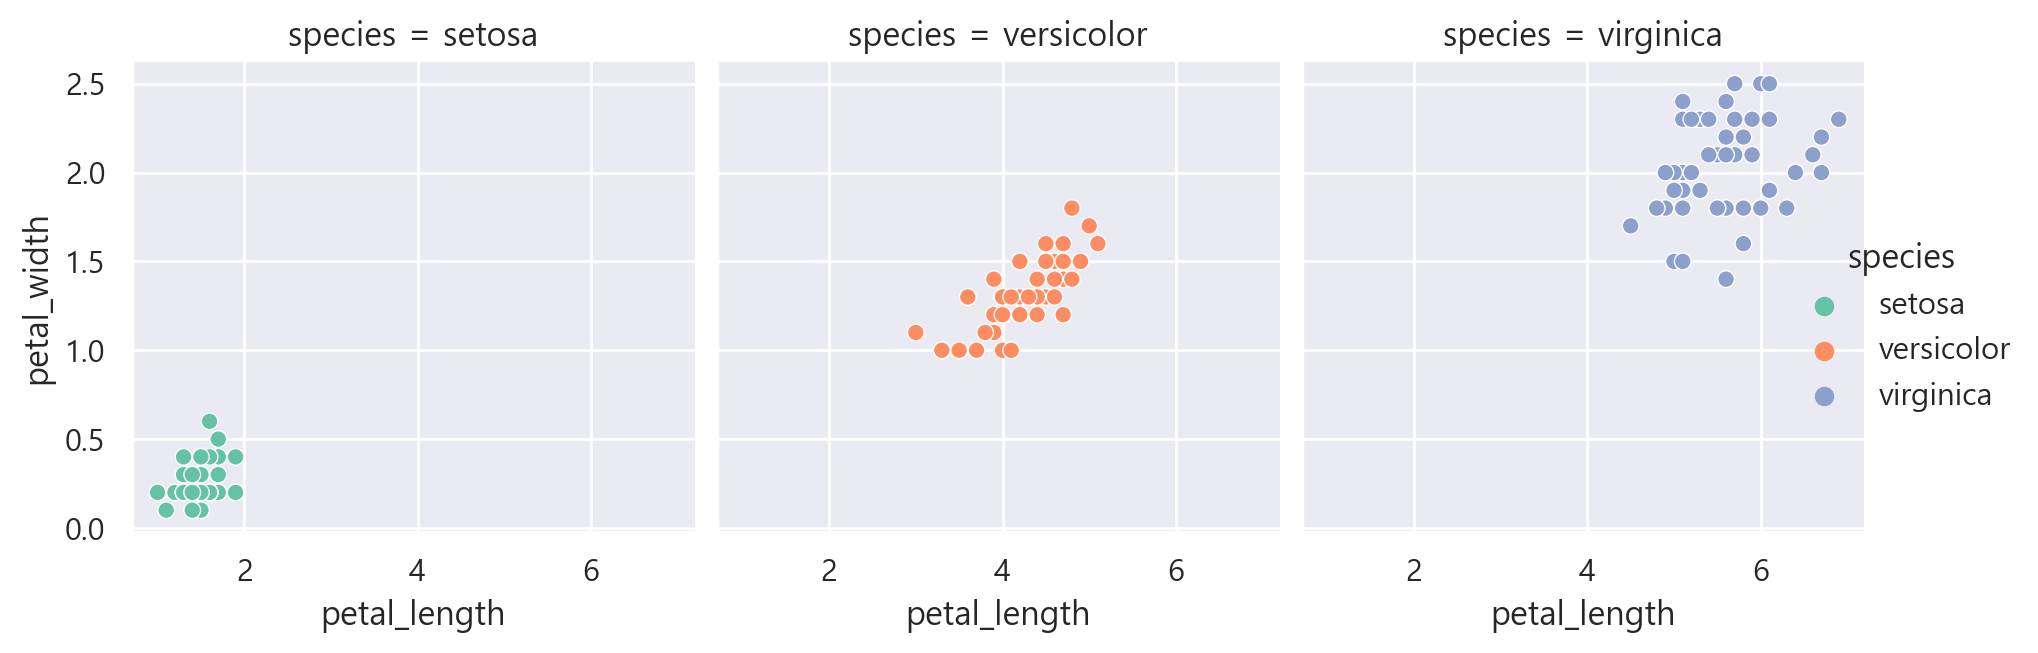

In [100]:
g = sns.relplot(iris, x='petal_length', y='petal_width', hue='species', col='species')
g.fig.set_size_inches(10,3)
plt.show()